Impartire date

In [ ]:
from google.colab import drive
import pandas as pd
from sklearn.model_selection import train_test_split
drive.mount('/content/drive')

Mounted at /content/drive


# **Preprocessing**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
!pip install stanza
import stanza
stanza.download('ro')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 57.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 38.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 24.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 870.6 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 90.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 44.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu

INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Downloading default packages for language: ro (Romanian) ...


INFO:stanza:Downloaded file to /root/stanza_resources/ro/default.zip
INFO:stanza:Finished downloading models and saved to /root/stanza_resources


In [ ]:
train_df=pd.read_csv('/content/drive/MyDrive/FoundationsNLP/df_train.csv')
validation_df=pd.read_csv('/content/drive/MyDrive/FoundationsNLP/df_validation.csv')
test_df=pd.read_csv('/content/drive/MyDrive/FoundationsNLP/df_test.csv')


In [ ]:
test_df.count()

,0
Text,300
Label,300
PunchLine,150


In [ ]:
df_train_label_0=train_df[train_df['Label']==0]
df_train_label_1=train_df[train_df['Label']==1]
df_validation_label_0=validation_df[validation_df['Label']==0]
df_validation_label_1=validation_df[validation_df['Label']==1]
df_test_label_0=test_df[test_df['Label']==0]
df_test_label_1=test_df[test_df['Label']==1]

X_train=train_df['Text']
y_train=train_df['Label']
X_validation=validation_df['Text']
y_validation=validation_df['Label']
X_test=test_df['Text']
y_test=test_df['Label']

In [ ]:
def replace_special_characters(text):
    replacements = {
        'ă': 'a', 'î': 'i', 'â': 'a', 'ș': 's', 'ț': 't'
    }
    for char, replacement in replacements.items():
        text = text.replace(char, replacement)
    return text

nlp = stanza.Pipeline('ro', processors='tokenize,pos', tokenize_pretokenized=False)
romanian_stop_words = ["a","abia","acea","aceasta","această","aceea","aceeasi","acei",
                       "aceia","acel","acela","acelasi","acele","acelea","acest","acesta","aceste",
                       "acestea","acestei","acestia","acestui","aceşti","aceştia","acolo","acord",
                       "acum","adica","ai","aia","aibă","aici","aiurea","al","ala","alaturi","ale",
                       "alea","alt","alta","altceva","altcineva","alte","altfel","alti","altii",
                       "altul","am","anume","apoi","ar","are","as","asa","asemenea","asta","astazi",
                       "astea","astfel","astăzi","asupra","atare","atat","atata","atatea","atatia",
                       "ati","atit","atita","atitea","atitia","atunci","au","avea","avem","aveţi",
                       "avut","azi","aş","aşadar","aţi","b","ba","bine","bucur","bună","c","ca",
                       "cam","cand","capat","care","careia","carora","caruia","cat","catre","caut",
                       "ce","cea","ceea","cei","ceilalti","cel","cele","celor","ceva","chiar","ci",
                       "cinci","cind","cine","cineva","cit","cita","cite","citeva","citi","citiva",
                       "conform","contra","cu","cui","cum","cumva","curând","curînd","când","cât",
                       "câte","câtva","câţi","cînd","cît","cîte","cîtva","cîţi","că","căci","cărei",
                       "căror","cărui","către","d","da","daca","dacă","dar","dat","datorită","dată",
                       "dau","de","deasupra","deci","decit","degraba","deja","deoarece","departe",
                       "desi","despre","deşi","din","dinaintea","dintr","dintr-","dintre","doar","doi",
                       "doilea","două","drept","dupa","după","dă","e","ea","ei","el","ele","era","eram",
                       "este","eu","exact","eşti","f","face","fara","fata","fel","fi","fie","fiecare",
                       "fii","fim","fiu","fiţi","foarte","fost","frumos","fără","g","geaba","graţie",
                       "h","halbă","i","ia","iar","ieri","ii","il","imi","in","inainte","inapoi","inca",
                       "incit","insa","intr","intre","isi","iti","j","k","l","la","le","li","lor","lui",
                       "lângă","lîngă","m","ma","mai","mare","mea","mei","mele","mereu","meu","mi","mie",
                       "mine","mod","mult","multa","multe","multi","multă","mulţi","mulţumesc","mâine",
                       "mîine","mă","n","ne","nevoie","ni","nici","niciodata","nicăieri","nimeni","nimeri",
                       "nimic","niste","nişte","noastre","noastră","noi","noroc","nostri","nostru","nou",
                       "noua","nouă","noştri","nu","numai","o","opt","or","ori","oricare","orice","oricine",
                       "oricum","oricând","oricât","oricînd","oricît","oriunde","p","pai","parca","patra",
                       "patru","patrulea","pe","pentru","peste","pic","pina","plus","poate","pot","prea",
                       "prima","primul","prin","printr-","putini","puţin","puţina","puţină","până","pînă",
                       "r","rog","s","sa","sa-mi","sa-ti","sai","sale","sau","se","si","sint","sintem",
                       "spate","spre","sub","sunt","suntem","sunteţi","sus","sută","sînt","sîntem","sînteţi",
                       "să","săi","său","t","ta","tale","te","ti","timp","tine","toata","toate","toată",
                       "tocmai","tot","toti","totul","totusi","totuşi","toţi","trei","treia","treilea","tu",
                       "tuturor","tăi","tău","u","ul","ului","un","una","unde","undeva","unei","uneia","unele",
                       "uneori","unii","unor","unora","unu","unui","unuia","unul","v","va","vi","voastre",
                       "voastră","voi","vom","vor","vostru","vouă","voştri","vreme","vreo","vreun","vă","x","z",
                       "zece","zero","zi","zice","îi","îl","îmi","împotriva","în","înainte","înaintea","încotro",
                       "încât","încît","între","întrucât","întrucît","îţi","ăla","ălea","ăsta","ăstea","ăştia",
                       "şapte","şase","şi","ştiu","ţi","ţie"]
def elimina_prepozitii(text):
    # Tokenizează textul
    doc = nlp(text)
    # Extrage cuvintele care nu sunt prepoziții și nu sunt în lista de stop words
    cuvinte_fara_stop_words = [
        word.text for sentence in doc.sentences
        for word in sentence.words
        if word.upos != 'ADP' and word.text.lower() not in romanian_stop_words
    ]
    # Reconstruiește propoziția
    return ' '.join(cuvinte_fara_stop_words)


INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: ro (Romanian):
| Processor | Package      |
----------------------------
| tokenize  | rrt          |
| pos       | rrt_nocharlm |

INFO:stanza:Using device: cuda
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: pos
INFO:stanza:Done loading processors!


In [ ]:
all_data=pd.concat([train_df, validation_df, test_df])
df_label_1 = all_data[all_data['Label'] == 1]
df_label_0 = all_data[all_data['Label'] == 0]

In [ ]:
df_label_0.count()

,0
Text,1349
Label,1349
PunchLine,0


In [ ]:
# Filtrare pentru a găsi rândurile cu un 'PunchLine' de tip float
row_with_float = df_label_1[df_label_1['PunchLine'].apply(lambda x: isinstance(x, float))]

# Verifică dacă există un astfel de rând
if not row_with_float.empty:
    # Modifică valoarea din 'PunchLine' pentru acest rând
    df_label_1.loc[df_label_1['PunchLine'].apply(lambda x: isinstance(x, float)), 'PunchLine'] = "insa testele si partialele nu"

    # Afișează DataFrame-ul modificat
    print(df_label_1)
else:
    print("Nu există niciun rând cu 'PunchLine' de tip float.")


                                                  Text  Label  \
0    Dacă fiul tău îți mulțumește că “ai avut grije...      1   
1    De ce sunt inundații în Texas? Pentru că e Mol...      1   
2    Nu știu nimic despre politică, dar știu să fac...      1   
3    Bătrânii aveau o vorbă: Dacă n-ai nimic bun de...      1   
4    Unii spun că nu ești bărbat dacă nu-ți place f...      1   
..                                                 ...    ...   
288  Un prieten se lăuda că e atât de bun că o pros...      1   
289  Un orgasm obisnuit arde 112 calorii, un orgasm...      1   
291  Am întrebat-o care e filmul ei preferat și mi-...      1   
296  Am o rablă cabrio vai mama ei. E o mașină deca...      1   
299  Cum numești o girafă care spune glume? O înălț...      1   

                                             PunchLine  
0                           înseamnă că n-ai prea avut  
1                                    Moldova Americii.  
2                                               

In [ ]:
# Aplică înlocuirea caracterelor speciale pentru coloanele 'Text' și 'PunchLine'
df_label_0['Text'] = df_label_0['Text'].apply(replace_special_characters)

df_label_1['Text'] = df_label_1['Text'].apply(replace_special_characters)
df_label_1['PunchLine'] = df_label_1['PunchLine'].apply(replace_special_characters)
# Verifică primele rânduri ale DataFrame-ului după modificare
print(df_label_0[['Text', 'PunchLine']].head())


                                                 Text PunchLine
20  Mi-a trimis un OP fals, amicu meu a lasat lapt...       NaN
22  M-am reintors anul urmator la facultate si nor...       NaN
23  Situatia mea financiara devine din ce in ce ma...       NaN
24  Cineva care ma poate ajuta cu un sfat/o recoma...       NaN
25  Cu cat construiesti mai multa infrastructura p...       NaN


<ipython-input-10-1ea0e9dd4f57>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_label_0['Text'] = df_label_0['Text'].apply(replace_special_characters)
<ipython-input-10-1ea0e9dd4f57>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_label_1['Text'] = df_label_1['Text'].apply(replace_special_characters)
<ipython-input-10-1ea0e9dd4f57>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [ ]:
X_train= X_train.apply(elimina_prepozitii).tolist()
vectorizer = TfidfVectorizer(stop_words=romanian_stop_words)
X_train_vectorized = vectorizer.fit_transform(X_train)

X_validation= X_validation.apply(elimina_prepozitii).tolist()
X_validation_vectorized = vectorizer.transform(X_validation)

X_test= X_test.apply(elimina_prepozitii).tolist()
X_test_vectorized = vectorizer.transform(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['printr'] not in stop_words.
  warnings.warn(


In [ ]:
df_label_0.loc[:, 'Text'] = df_label_0['Text'].apply(elimina_prepozitii)

df_label_1.loc[:, 'Text'] = df_label_1['Text'].apply(elimina_prepozitii)
df_label_1.loc[:, 'PunchLine'] = df_label_1['PunchLine'].apply(elimina_prepozitii)


# **Logistic Regression**

In [ ]:
!pip install shap
!pip install lime


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 10.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=1390208844b8b181111f0775ff2a15e9218d98c123459fc76cd2699a36ea044e
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


Acuratețe: 0.85

Raport de clasificare:
              precision    recall  f1-score   support

           0       0.87      0.83      0.85       150
           1       0.84      0.87      0.86       150

    accuracy                           0.85       300
   macro avg       0.85      0.85      0.85       300
weighted avg       0.85      0.85      0.85       300



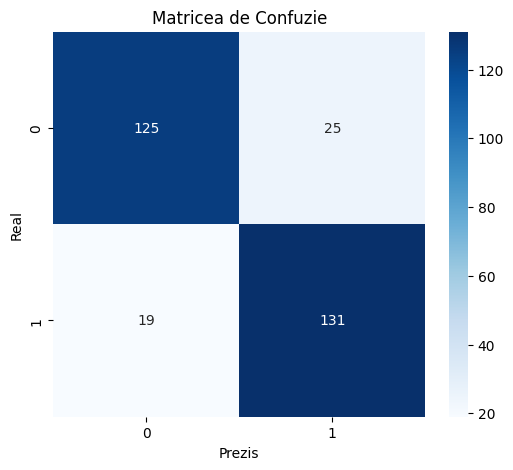

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 3. Crearea și antrenarea modelului Logistic Regression
model = LogisticRegression(random_state=42, max_iter=500)  # max_iter pentru convergență
model.fit(X_train_vectorized, y_train)

# 4. Prezicerea pe setul de test
y_pred = model.predict(X_test_vectorized)

# 5. Evaluarea modelului
accuracy = accuracy_score(y_test, y_pred)
print(f"Acuratețe: {accuracy:.2f}\n")
print("Raport de clasificare:")
print(classification_report(y_test, y_pred))

# 6. Matricea de confuzie
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Prezis')
plt.ylabel('Real')
plt.title('Matricea de Confuzie')
plt.show()


In [ ]:
import pandas as pd

# Assuming X_test is a DataFrame or a list of sentences
# 7. Identificarea și afișarea propozițiilor cu confuzie
confusion_indices = (y_pred != y_test)

# Extragem propozițiile cu predicții greșite
confusion_sentences = np.array(X_test)[confusion_indices]

# Afișăm propozițiile împreună cu etichetele reale și prezise
print("Propozițiile cu confuzie:")
for index, sentence in enumerate(confusion_sentences):
    actual_label = y_test[confusion_indices].iloc[index]
    predicted_label = y_pred[confusion_indices][index]
    print(f"Propoziție: {sentence}\nEtichetă reală: {actual_label}, Etichetă prezisă: {predicted_label}\n")


Propozițiile cu confuzie:
Propoziție: tras câteva și traversat sărind fața masinilor merge dubios făcea parcangiul celălalt sens mers
Etichetă reală: 0, Etichetă prezisă: 1

Propoziție: suferit ascuns
Etichetă reală: 0, Etichetă prezisă: 1

Propoziție: Măcar învață " școala "
Etichetă reală: 0, Etichetă prezisă: 1

Propoziție: atât apreciez regele fotbalului românesc știu ajuns atât ciuda handicap membre și handicap exprimare .
Etichetă reală: 1, Etichetă prezisă: 0

Propoziție: Zborul avionul fapt sigur transport lift și trimisul p***a -tii .
Etichetă reală: 1, Etichetă prezisă: 0

Propoziție: complex turistic ? mari proprietari hoteluri țară cumpărat teren aproape hectare Poiana Brașov
Etichetă reală: 0, Etichetă prezisă: 1

Propoziție: Sincer , singura parte băiat n- fetiță .
Etichetă reală: 1, Etichetă prezisă: 0

Propoziție: pădurice frumoasă mulți fazani
Etichetă reală: 0, Etichetă prezisă: 1

Propoziție: dorm , randament
Etichetă reală: 0, Etichetă prezisă: 1

Propoziție: place 

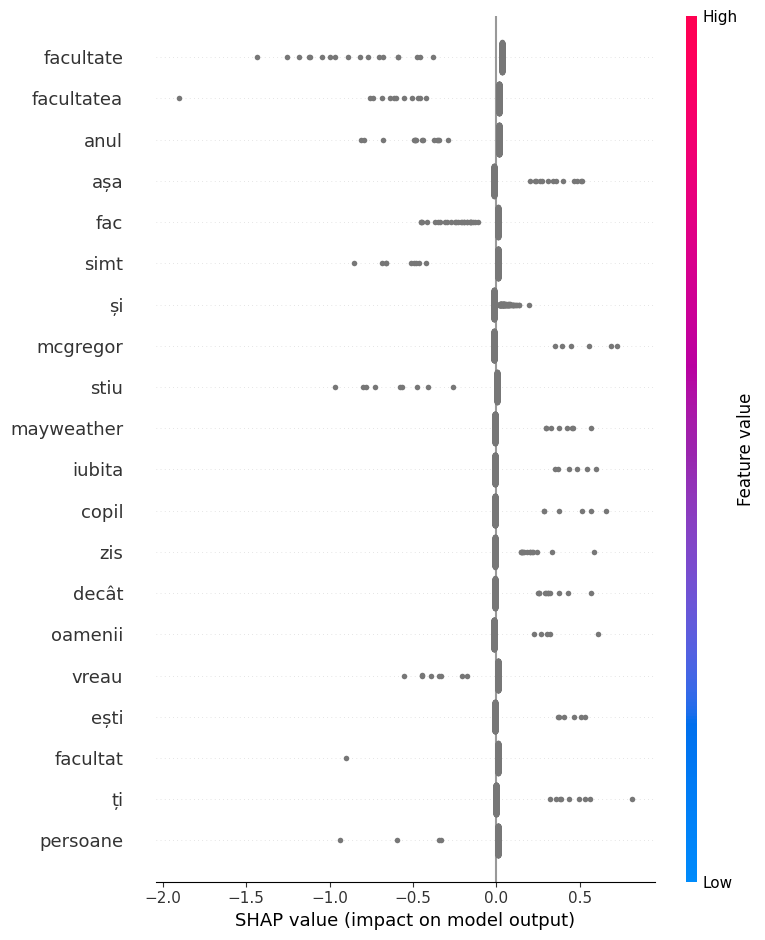

In [ ]:
import shap

# Crearea unui explainer SHAP
explainer = shap.Explainer(model, X_train_vectorized)

# Calcularea valorilor SHAP pentru setul de test
shap_values = explainer(X_test_vectorized)

# Vizualizarea importanței globale a caracteristicilor (cuvintelor)
shap.summary_plot(shap_values, X_test_vectorized, feature_names=vectorizer.get_feature_names_out())

# Vizualizarea valorilor SHAP pentru o instanță individuală
shap.initjs()  # Inițializează JS pentru vizualizare interactivă
shap.force_plot(shap_values[2])  # Exemplu pentru prima instanță din test set


# **SVM**

In [ ]:
model = SVC(kernel='linear', random_state=42)
model.fit(X_train_vectorized, y_train)

# 6. Evaluarea modelului
y_pred = model.predict(X_test_vectorized)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8533333333333334
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.83      0.85       150
           1       0.84      0.88      0.86       150

    accuracy                           0.85       300
   macro avg       0.85      0.85      0.85       300
weighted avg       0.85      0.85      0.85       300



In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculează matricea de confuzie
conf_matrix = confusion_matrix(y_test, y_pred)

# Afișează matricea de confuzie brută
print("Matricea de confuzie:")
print(conf_matrix)


Matricea de confuzie:
[[124  26]
 [ 18 132]]


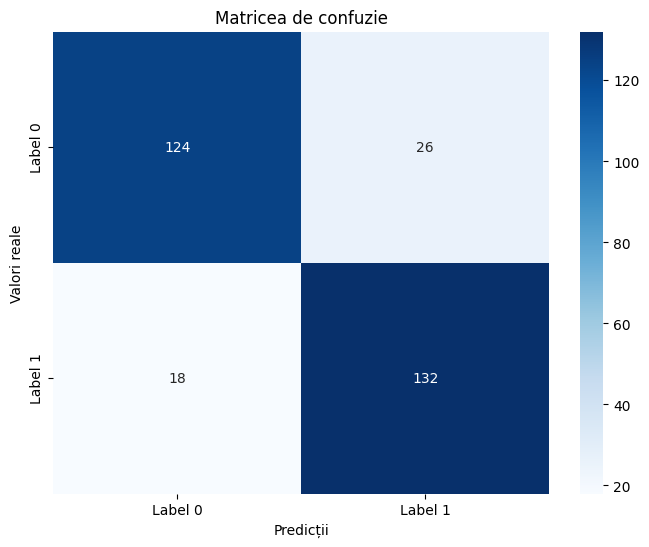

In [ ]:
# Vizualizare grafică
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Label 0', 'Label 1'], yticklabels=['Label 0', 'Label 1'])
plt.title('Matricea de confuzie')
plt.xlabel('Predicții')
plt.ylabel('Valori reale')
plt.show()


In [ ]:
import pandas as pd

# Assuming X_test is a DataFrame or a list of sentences
# 7. Identificarea și afișarea propozițiilor cu confuzie
confusion_indices = (y_pred != y_test)

# Extragem propozițiile cu predicții greșite
confusion_sentences = np.array(X_test)[confusion_indices]

# Afișăm propozițiile împreună cu etichetele reale și prezise
print("Propozițiile cu confuzie:")
for index, sentence in enumerate(confusion_sentences):
    actual_label = y_test[confusion_indices].iloc[index]
    predicted_label = y_pred[confusion_indices][index]
    print(f"Propoziție: {sentence}\nEtichetă reală: {actual_label}, Etichetă prezisă: {predicted_label}\n")


Propozițiile cu confuzie:
Propoziție: tras câteva și traversat sărind fața masinilor merge dubios făcea parcangiul celălalt sens mers
Etichetă reală: 0, Etichetă prezisă: 1

Propoziție: suferit ascuns
Etichetă reală: 0, Etichetă prezisă: 1

Propoziție: Măcar învață " școala "
Etichetă reală: 0, Etichetă prezisă: 1

Propoziție: Saptamana Nord Coreeana Lidl furat ras !
Etichetă reală: 0, Etichetă prezisă: 1

Propoziție: atât apreciez regele fotbalului românesc știu ajuns atât ciuda handicap membre și handicap exprimare .
Etichetă reală: 1, Etichetă prezisă: 0

Propoziție: complex turistic ? mari proprietari hoteluri țară cumpărat teren aproape hectare Poiana Brașov
Etichetă reală: 0, Etichetă prezisă: 1

Propoziție: Sincer , singura parte băiat n- fetiță .
Etichetă reală: 1, Etichetă prezisă: 0

Propoziție: pădurice frumoasă mulți fazani
Etichetă reală: 0, Etichetă prezisă: 1

Propoziție: dorm , randament
Etichetă reală: 0, Etichetă prezisă: 1

Propoziție: place privesc cerul noaptea . p

# **Bayes**

Accuracy: 0.8666666666666667
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.87      0.87       150
           1       0.87      0.87      0.87       150

    accuracy                           0.87       300
   macro avg       0.87      0.87      0.87       300
weighted avg       0.87      0.87      0.87       300



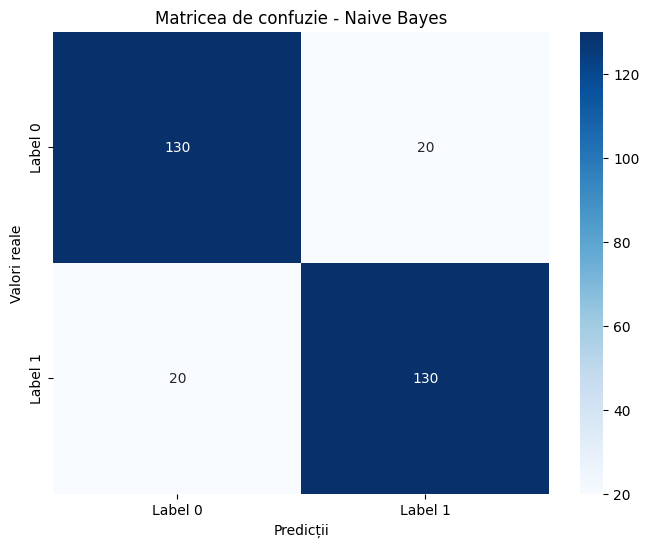

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Crearea modelului Naive Bayes
nb_model = MultinomialNB()

# 2. Antrenarea modelului
nb_model.fit(X_train_vectorized, y_train)

# 3. Predicții pe setul de testare
y_pred = nb_model.predict(X_test_vectorized)

# 4. Evaluarea modelului
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# 5. Matricea de confuzie
conf_matrix = confusion_matrix(y_test, y_pred)

# Vizualizare grafică a matricei de confuzie
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Label 0', 'Label 1'], yticklabels=['Label 0', 'Label 1'])
plt.title('Matricea de confuzie - Naive Bayes')
plt.xlabel('Predicții')
plt.ylabel('Valori reale')
plt.show()


In [ ]:
import pandas as pd

# Assuming X_test is a DataFrame or a list of sentences
# 7. Identificarea și afișarea propozițiilor cu confuzie
confusion_indices = (y_pred != y_test)

# Extragem propozițiile cu predicții greșite
confusion_sentences = np.array(X_test)[confusion_indices]

# Afișăm propozițiile împreună cu etichetele reale și prezise
print("Propozițiile cu confuzie:")
for index, sentence in enumerate(confusion_sentences):
    actual_label = y_test[confusion_indices].iloc[index]
    predicted_label = y_pred[confusion_indices][index]
    print(f"Propoziție: {sentence}\nEtichetă reală: {actual_label}, Etichetă prezisă: {predicted_label}\n")


Propozițiile cu confuzie:
Propoziție: tras câteva și traversat sărind fața masinilor merge dubios făcea parcangiul celălalt sens mers
Etichetă reală: 0, Etichetă prezisă: 1

Propoziție: suferit ascuns
Etichetă reală: 0, Etichetă prezisă: 1

Propoziție: Măcar învață " școala "
Etichetă reală: 0, Etichetă prezisă: 1

Propoziție: atât apreciez regele fotbalului românesc știu ajuns atât ciuda handicap membre și handicap exprimare .
Etichetă reală: 1, Etichetă prezisă: 0

Propoziție: Zborul avionul fapt sigur transport lift și trimisul p***a -tii .
Etichetă reală: 1, Etichetă prezisă: 0

Propoziție: complex turistic ? mari proprietari hoteluri țară cumpărat teren aproape hectare Poiana Brașov
Etichetă reală: 0, Etichetă prezisă: 1

Propoziție: Sincer , singura parte băiat n- fetiță .
Etichetă reală: 1, Etichetă prezisă: 0

Propoziție: Ganduri trec cap sari parasuta : oare tarziu spun ?
Etichetă reală: 1, Etichetă prezisă: 0

Propoziție: pădurice frumoasă mulți fazani
Etichetă reală: 0, Etic

# **Robert**

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/397k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/500M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at dumitrescustefan/bert-base-romanian-cased-v1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Epoch 1/10 - Training: 100%|██████████| 132/132 [03:08<00:00,  1.43s/it]


Epoch 1:
Train Loss: 0.2208, Train Accuracy: 0.9129
Val Loss: 0.1320, Val Accuracy: 0.9600


Epoch 2/10 - Training: 100%|██████████| 132/132 [03:07<00:00,  1.42s/it]


Epoch 2:
Train Loss: 0.0568, Train Accuracy: 0.9814
Val Loss: 0.1086, Val Accuracy: 0.9667


Epoch 3/10 - Training: 100%|██████████| 132/132 [03:08<00:00,  1.43s/it]


Epoch 3:
Train Loss: 0.0222, Train Accuracy: 0.9933
Val Loss: 0.1125, Val Accuracy: 0.9733


Epoch 4/10 - Training: 100%|██████████| 132/132 [03:09<00:00,  1.43s/it]


Epoch 4:
Train Loss: 0.0026, Train Accuracy: 1.0000
Val Loss: 0.1428, Val Accuracy: 0.9733


Epoch 5/10 - Training: 100%|██████████| 132/132 [03:07<00:00,  1.42s/it]


Epoch 5:
Train Loss: 0.0008, Train Accuracy: 1.0000
Val Loss: 0.1352, Val Accuracy: 0.9733

Early stopping triggered after epoch 5


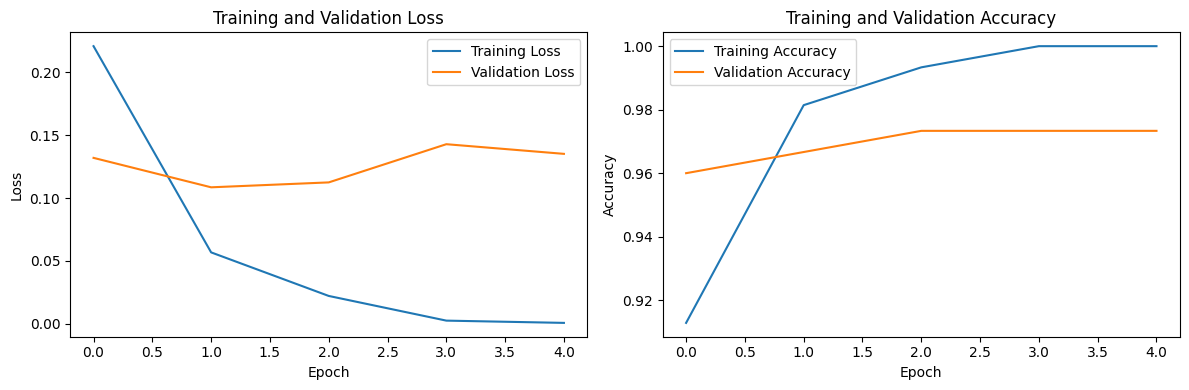


Best validation accuracy: 0.9733

Final test accuracy: 0.9733
Final test loss: 0.1352


<Figure size 1000x800 with 0 Axes>

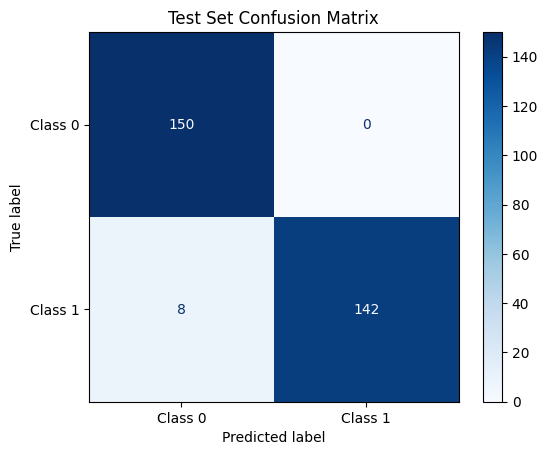


Test Set Confusion Matrix:
-------------------------
True Negatives: 150
False Positives: 0
False Negatives: 8
True Positives: 142

Metrics:
---------
Precision: 1.0000
Recall: 0.9467
F1 Score: 0.9726


('RoBERT_model_humor_classification_tokenizer/tokenizer_config.json',
 'RoBERT_model_humor_classification_tokenizer/special_tokens_map.json',
 'RoBERT_model_humor_classification_tokenizer/vocab.txt',
 'RoBERT_model_humor_classification_tokenizer/added_tokens.json',
 'RoBERT_model_humor_classification_tokenizer/tokenizer.json')

In [ ]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import numpy as np
from tqdm import tqdm
import pandas as pd
import matplotlib.pyplot as plt

class TextDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length=512):
        self.texts = texts.tolist() if isinstance(texts, pd.Series) else texts
        self.labels = labels.tolist() if isinstance(labels, pd.Series) else labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts[idx])
        label = self.labels[idx]

        encoding = self.tokenizer(
            text,
            add_special_tokens=True,
            max_length=self.max_length,
            padding='max_length',
            truncation=True,
            return_tensors='pt'
        )

        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'label': torch.tensor(label, dtype=torch.long)
        }

def evaluate_model(model, data_loader, device):
    model.eval()
    predictions = []
    true_labels = []
    total_loss = 0

    with torch.no_grad():
        for batch in data_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['label'].to(device)

            outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            total_loss += loss.item()

            preds = torch.argmax(outputs.logits, dim=1).cpu().numpy()
            predictions.extend(preds)
            true_labels.extend(labels.cpu().numpy())

    accuracy = accuracy_score(true_labels, predictions)
    avg_loss = total_loss / len(data_loader)

    return accuracy, avg_loss, predictions, true_labels

def plot_confusion_matrix(y_true, y_pred, title='Confusion Matrix'):
    plt.figure(figsize=(10, 8))
    cm = confusion_matrix(y_true, y_pred)

    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])
    disp.plot(cmap='Blues')

    plt.title(title)
    plt.show()

    print(f"\n{title}:")
    print("-" * len(title))
    print(f"True Negatives: {cm[0][0]}")
    print(f"False Positives: {cm[0][1]}")
    print(f"False Negatives: {cm[1][0]}")
    print(f"True Positives: {cm[1][1]}")

    precision = cm[1][1] / (cm[1][1] + cm[0][1])
    recall = cm[1][1] / (cm[1][1] + cm[1][0])
    f1 = 2 * (precision * recall) / (precision + recall)

    print("\nMetrics:")
    print("---------")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

def train_model(model, train_loader, val_loader, device, epochs=3, patience=2):
    optimizer = torch.optim.AdamW(model.parameters(), lr=2e-5)
    best_val_accuracy = 0
    best_model_state = None
    patience_counter = 0

    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []

    for epoch in range(epochs):
        # Training phase
        model.train()
        train_loss = 0
        train_predictions = []
        train_true_labels = []

        for batch in tqdm(train_loader, desc=f'Epoch {epoch + 1}/{epochs} - Training'):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['label'].to(device)

            outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            train_loss += loss.item()

            preds = torch.argmax(outputs.logits, dim=1).cpu().numpy()
            train_predictions.extend(preds)
            train_true_labels.extend(labels.cpu().numpy())

        # Calculate training metrics
        train_accuracy = accuracy_score(train_true_labels, train_predictions)
        avg_train_loss = train_loss / len(train_loader)
        train_losses.append(avg_train_loss)
        train_accuracies.append(train_accuracy)

        # Validation phase
        val_accuracy, val_loss, val_predictions, val_true = evaluate_model(model, val_loader, device)
        val_losses.append(val_loss)
        val_accuracies.append(val_accuracy)

        print(f'Epoch {epoch + 1}:')
        print(f'Train Loss: {avg_train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}')
        print(f'Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}')

        # Early stopping with patience
        if val_accuracy > best_val_accuracy:
            best_val_accuracy = val_accuracy
            best_model_state = model.state_dict().copy()
            patience_counter = 0
        else:
            patience_counter += 1
            if patience_counter >= patience:
                print(f'\nEarly stopping triggered after epoch {epoch + 1}')
                break

    # Load best model state
    if best_model_state is not None:
        model.load_state_dict(best_model_state)

    # Plot training history
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Training Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(train_accuracies, label='Training Accuracy')
    plt.plot(val_accuracies, label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

    return best_val_accuracy

def main(X_train, y_train, X_val, y_val, X_test, y_test):
    # Load Romanian RoBERTa model and tokenizer
    model_name = "dumitrescustefan/bert-base-romanian-cased-v1"
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2)

    # Create datasets
    train_dataset = TextDataset(X_train, y_train, tokenizer)
    val_dataset = TextDataset(X_val, y_val, tokenizer)
    test_dataset = TextDataset(X_test, y_test, tokenizer)

    # Create dataloaders
    train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=32)
    test_loader = DataLoader(test_dataset, batch_size=32)

    # Set device
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model.to(device)

    # Train the model
    best_val_accuracy = train_model(model, train_loader, val_loader, device, epochs=10, patience=2)
    print(f'\nBest validation accuracy: {best_val_accuracy:.4f}')

    # Evaluate on test set
    test_accuracy, test_loss, test_predictions, test_true = evaluate_model(model, test_loader, device)
    print(f'\nFinal test accuracy: {test_accuracy:.4f}')
    print(f'Final test loss: {test_loss:.4f}')

    # Plot final test confusion matrix
    plot_confusion_matrix(test_true, test_predictions, title='Test Set Confusion Matrix')

    return model, tokenizer
X_train=train_df['Text']
y_train=train_df['Label']
X_validation=validation_df['Text']
y_validation=validation_df['Label']
X_test=test_df['Text']
y_test=test_df['Label']
# Run the training
model, tokenizer = main(X_train, y_train, X_validation, y_validation, X_test, y_test)
# Salvare model + tokenizer
model.save_pretrained("RoBERT_model_humor_classification")
tokenizer.save_pretrained("RoBERT_model_humor_classification_tokenizer")

In [ ]:
# 6. Testarea pe noi propoziții
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
new_texts = ["Vecinul meu e așa zgârcit că stinge lumina la frigider!"]
new_encodings = tokenizer(new_texts, truncation=True, padding=True, return_tensors="pt").to(device)

# Mutăm encodările pe GPU
predictions = model(**new_encodings).logits
predicted_labels = torch.argmax(predictions, axis=1)
print("Predicții:", predicted_labels.tolist())

NameError: name 'model' is not defined

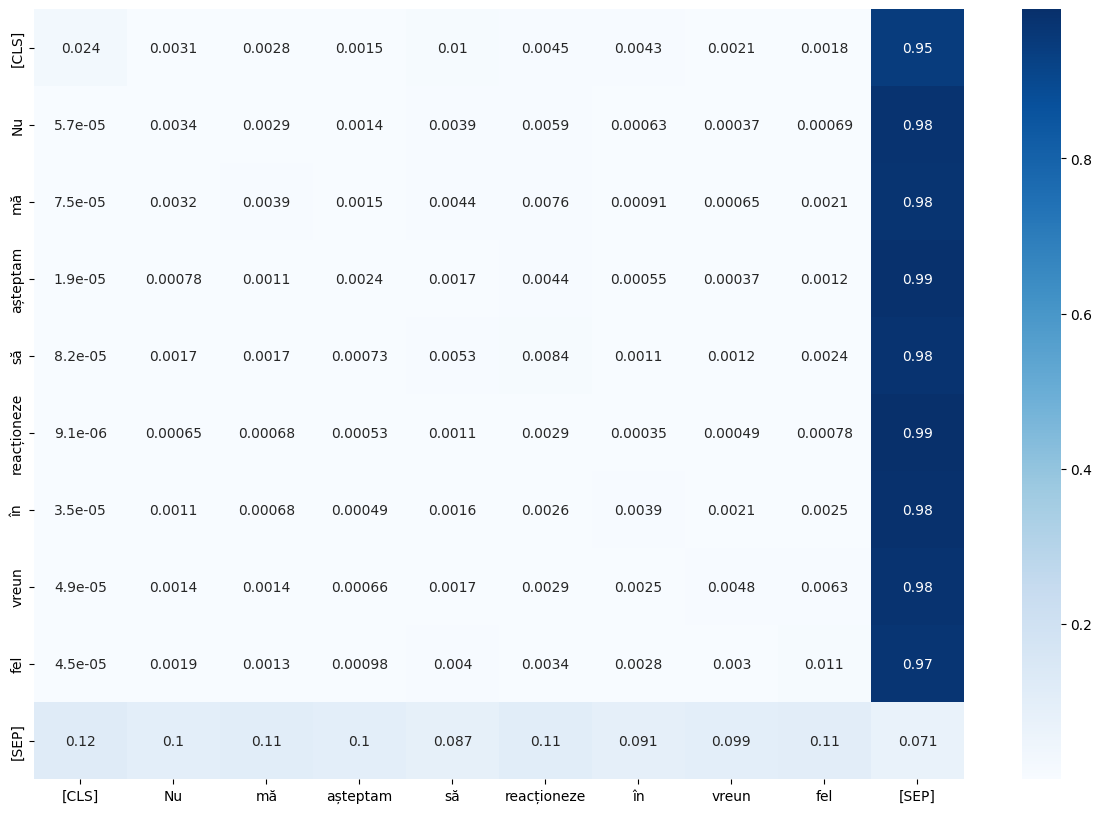

In [ ]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer
import torch
import matplotlib.pyplot as plt
import seaborn as sns

# Încarcă modelul și tokenizerul
model = AutoModelForSequenceClassification.from_pretrained("/content/drive/MyDrive/FoundationsNLP/RoBERT_model_humor_classification", output_attentions=True)
tokenizer = AutoTokenizer.from_pretrained("/content/drive/MyDrive/FoundationsNLP/RoBERT_model_humor_classification_tokenizer")

# Exemplu de propoziție
sentence = "Nu mă așteptam să reacționeze în vreun fel "

# Tokenizare
inputs = tokenizer(sentence, return_tensors="pt")

# Inferență fără calculul gradientului
with torch.no_grad():
    outputs = model(**inputs)

# Extrage matricile de atenție
attentions = outputs.attentions  # Acum nu mai trebuie să fie None

# Verifică dacă atenția este activă
if attentions is None:
    print("⚠️ Modelul nu returnează atenția. Verifică dacă suportă output_attentions=True.")
else:
    # Selectează ultimul strat și primul cap de atenție
    layer_idx = -1  # Ultimul strat
    head_idx = -1  # Primul cap de atenție

    attention_matrix = attentions[layer_idx][0, head_idx].cpu().numpy()
    tokens = tokenizer.convert_ids_to_tokens(inputs["input_ids"][0])

    # Afișează heatmap-ul atenției
    plt.figure(figsize=(15, 10))
    sns.heatmap(attention_matrix, xticklabels=tokens, yticklabels=tokens, cmap="Blues", annot=True)
    plt.show()


# **Robert + Lora**

In [ ]:
pip install peft

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at dumitrescustefan/bert-base-romanian-cased-v1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


trainable params: 1,181,186 || all params: 125,624,068 || trainable%: 0.9403


Epoch 1/10 - Training: 100%|██████████| 132/132 [02:23<00:00,  1.08s/it]


Epoch 1:
Train Loss: 0.2990, Train Accuracy: 0.8752
Val Loss: 0.1661, Val Accuracy: 0.9533


Epoch 2/10 - Training: 100%|██████████| 132/132 [02:21<00:00,  1.07s/it]


Epoch 2:
Train Loss: 0.1550, Train Accuracy: 0.9362
Val Loss: 0.1145, Val Accuracy: 0.9600


Epoch 3/10 - Training: 100%|██████████| 132/132 [02:21<00:00,  1.07s/it]


Epoch 3:
Train Loss: 0.1039, Train Accuracy: 0.9581
Val Loss: 0.1312, Val Accuracy: 0.9533


Epoch 4/10 - Training: 100%|██████████| 132/132 [02:21<00:00,  1.07s/it]


Epoch 4:
Train Loss: 0.0640, Train Accuracy: 0.9752
Val Loss: 0.1159, Val Accuracy: 0.9600

Early stopping triggered after epoch 4


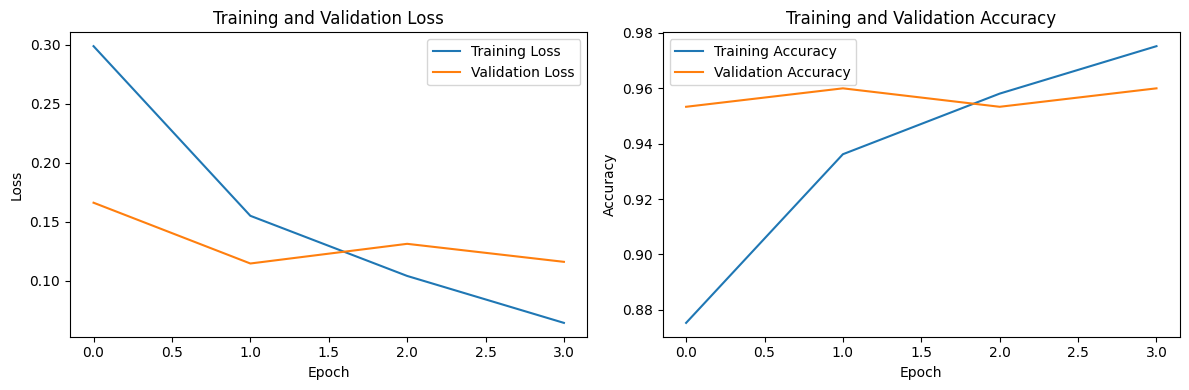


Best validation accuracy (LORA): 0.9600

Final test accuracy (LORA): 0.9600
Final test loss (LORA): 0.1158


<Figure size 1000x800 with 0 Axes>

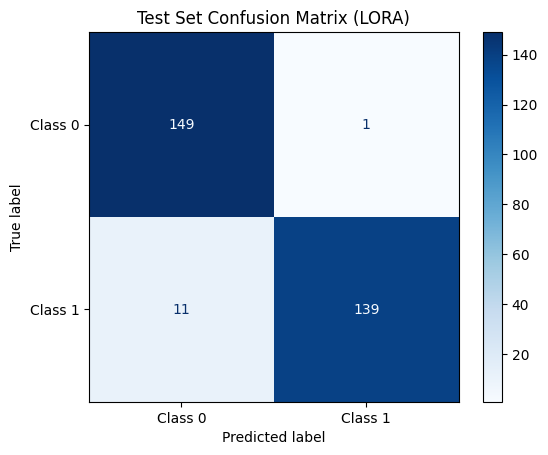


Test Set Confusion Matrix (LORA):
--------------------------------
True Negatives: 149
False Positives: 1
False Negatives: 11
True Positives: 139

Metrics:
---------
Precision: 0.9929
Recall: 0.9267
F1 Score: 0.9586


('RoBERT_model_humor_classification_lora_tokenizer/tokenizer_config.json',
 'RoBERT_model_humor_classification_lora_tokenizer/special_tokens_map.json',
 'RoBERT_model_humor_classification_lora_tokenizer/vocab.txt',
 'RoBERT_model_humor_classification_lora_tokenizer/added_tokens.json',
 'RoBERT_model_humor_classification_lora_tokenizer/tokenizer.json')

In [ ]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import numpy as np
from tqdm import tqdm
import pandas as pd
import matplotlib.pyplot as plt
from peft import LoraConfig, get_peft_model

class TextDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length=512):
        self.texts = texts.tolist() if isinstance(texts, pd.Series) else texts
        self.labels = labels.tolist() if isinstance(labels, pd.Series) else labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts[idx])
        label = self.labels[idx]

        encoding = self.tokenizer(
            text,
            add_special_tokens=True,
            max_length=self.max_length,
            padding='max_length',
            truncation=True,
            return_tensors='pt'
        )

        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'label': torch.tensor(label, dtype=torch.long)
        }

def evaluate_model(model, data_loader, device):
    model.eval()
    predictions = []
    true_labels = []
    total_loss = 0

    with torch.no_grad():
        for batch in data_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['label'].to(device)

            outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            total_loss += loss.item()

            preds = torch.argmax(outputs.logits, dim=1).cpu().numpy()
            predictions.extend(preds)
            true_labels.extend(labels.cpu().numpy())

    accuracy = accuracy_score(true_labels, predictions)
    avg_loss = total_loss / len(data_loader)

    return accuracy, avg_loss, predictions, true_labels

def plot_confusion_matrix(y_true, y_pred, title='Confusion Matrix'):
    plt.figure(figsize=(10, 8))
    cm = confusion_matrix(y_true, y_pred)

    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])
    disp.plot(cmap='Blues')

    plt.title(title)
    plt.show()

    print(f"\n{title}:")
    print("-" * len(title))
    print(f"True Negatives: {cm[0][0]}")
    print(f"False Positives: {cm[0][1]}")
    print(f"False Negatives: {cm[1][0]}")
    print(f"True Positives: {cm[1][1]}")

    if (cm[1][1] + cm[0][1]) > 0:
        precision = cm[1][1] / (cm[1][1] + cm[0][1])
    else:
        precision = 0.0

    if (cm[1][1] + cm[1][0]) > 0:
        recall = cm[1][1] / (cm[1][1] + cm[1][0])
    else:
        recall = 0.0

    if (precision + recall) > 0:
        f1 = 2 * (precision * recall) / (precision + recall)
    else:
        f1 = 0.0

    print("\nMetrics:")
    print("---------")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

def train_model_lora(model, train_loader, val_loader, device, epochs=3, patience=2):
    optimizer = torch.optim.AdamW(model.parameters(), lr=1e-4) # Lower learning rate for LORA
    best_val_accuracy = 0
    best_model_state = None
    patience_counter = 0

    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []

    for epoch in range(epochs):
        # Training phase
        model.train()
        train_loss = 0
        train_predictions = []
        train_true_labels = []

        for batch in tqdm(train_loader, desc=f'Epoch {epoch + 1}/{epochs} - Training'):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['label'].to(device)

            outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            train_loss += loss.item()

            preds = torch.argmax(outputs.logits, dim=1).cpu().numpy()
            train_predictions.extend(preds)
            train_true_labels.extend(labels.cpu().numpy())

        # Calculate training metrics
        train_accuracy = accuracy_score(train_true_labels, train_predictions)
        avg_train_loss = train_loss / len(train_loader)
        train_losses.append(avg_train_loss)
        train_accuracies.append(train_accuracy)

        # Validation phase
        val_accuracy, val_loss, val_predictions, val_true = evaluate_model(model, val_loader, device)
        val_losses.append(val_loss)
        val_accuracies.append(val_accuracy)

        print(f'Epoch {epoch + 1}:')
        print(f'Train Loss: {avg_train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}')
        print(f'Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}')

        # Early stopping with patience
        if val_accuracy > best_val_accuracy:
            best_val_accuracy = val_accuracy
            best_model_state = model.state_dict().copy()
            patience_counter = 0
        else:
            patience_counter += 1
            if patience_counter >= patience:
                print(f'\nEarly stopping triggered after epoch {epoch + 1}')
                break

    # Load best model state
    if best_model_state is not None:
        model.load_state_dict(best_model_state)

    # Plot training history
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Training Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(train_accuracies, label='Training Accuracy')
    plt.plot(val_accuracies, label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

    return best_val_accuracy

def main_lora(X_train, y_train, X_val, y_val, X_test, y_test):
    # Load Romanian RoBERTa model and tokenizer
    model_name = "dumitrescustefan/bert-base-romanian-cased-v1"
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    base_model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2)

    # Configure LORA
    lora_config = LoraConfig(
        r=32,
        lora_alpha=128,
        lora_dropout=0.3,
        bias="none",
        task_type="SEQ_CLS" # Sequence classification
    )

    # Get the LORA model
    model = get_peft_model(base_model, lora_config)
    model.print_trainable_parameters()

    # Create datasets
    train_dataset = TextDataset(X_train, y_train, tokenizer)
    val_dataset = TextDataset(X_val, y_val, tokenizer)
    test_dataset = TextDataset(X_test, y_test, tokenizer)

    # Create dataloaders
    train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=32)
    test_loader = DataLoader(test_dataset, batch_size=32)

    # Set device
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model.to(device)

    # Train the LORA adapted model
    best_val_accuracy = train_model_lora(model, train_loader, val_loader, device, epochs=10, patience=2)
    print(f'\nBest validation accuracy (LORA): {best_val_accuracy:.4f}')

    # Evaluate on test set
    test_accuracy, test_loss, test_predictions, test_true = evaluate_model(model, test_loader, device)
    print(f'\nFinal test accuracy (LORA): {test_accuracy:.4f}')
    print(f'Final test loss (LORA): {test_loss:.4f}')

    # Plot final test confusion matrix
    plot_confusion_matrix(test_true, test_predictions, title='Test Set Confusion Matrix (LORA)')

    return model, tokenizer

# Assuming train_df, validation_df, and test_df are already loaded
X_train=train_df['Text']
y_train=train_df['Label']
X_validation=validation_df['Text']
y_validation=validation_df['Label']
X_test=test_df['Text']
y_test=test_df['Label']

# Run the training with LORA
lora_model, lora_tokenizer = main_lora(X_train, y_train, X_validation, y_validation, X_test, y_test)

# Salvare model LORA + tokenizer
lora_model.save_pretrained("RoBERT_model_humor_classification_lora")
lora_tokenizer.save_pretrained("RoBERT_model_humor_classification_lora_tokenizer")

In [ ]:
# 6. Testarea pe noi propoziții
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
lora_model.to(device)
new_texts = ["Vecinul meu e așa zgârcit că stinge lumina la frigider!"]
new_encodings = lora_tokenizer(new_texts, truncation=True, padding=True, return_tensors="pt").to(device)

# Mutăm encodările pe GPU
predictions = lora_model(**new_encodings).logits
predicted_labels = torch.argmax(predictions, axis=1)
print("Predicții:", predicted_labels.tolist())

Predicții: [1]


# **Roberta**

In [ ]:
pip install transformers datasets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 17.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 18.9 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import numpy as np
from tqdm import tqdm
import pandas as pd
import matplotlib.pyplot as plt

class TextDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length=512):
        self.texts = texts.tolist() if isinstance(texts, pd.Series) else texts
        self.labels = labels.tolist() if isinstance(labels, pd.Series) else labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts[idx])
        label = self.labels[idx]

        encoding = self.tokenizer(
            text,
            add_special_tokens=True,
            max_length=self.max_length,
            padding='max_length',
            truncation=True,
            return_tensors='pt'
        )

        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'label': torch.tensor(label, dtype=torch.long)
        }

def evaluate_model(model, data_loader, device):
    model.eval()
    predictions = []
    true_labels = []
    total_loss = 0

    with torch.no_grad():
        for batch in data_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['label'].to(device)

            outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            total_loss += loss.item()

            preds = torch.argmax(outputs.logits, dim=1).cpu().numpy()
            predictions.extend(preds)
            true_labels.extend(labels.cpu().numpy())

    accuracy = accuracy_score(true_labels, predictions)
    avg_loss = total_loss / len(data_loader)

    return accuracy, avg_loss, predictions, true_labels

def plot_confusion_matrix(y_true, y_pred, title='Confusion Matrix'):
    plt.figure(figsize=(10, 8))
    cm = confusion_matrix(y_true, y_pred)

    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])
    disp.plot(cmap='Blues')

    plt.title(title)
    plt.show()

    print(f"\n{title}:")
    print("-" * len(title))
    print(f"True Negatives: {cm[0][0]}")
    print(f"False Positives: {cm[0][1]}")
    print(f"False Negatives: {cm[1][0]}")
    print(f"True Positives: {cm[1][1]}")

    precision = cm[1][1] / (cm[1][1] + cm[0][1])
    recall = cm[1][1] / (cm[1][1] + cm[1][0])
    f1 = 2 * (precision * recall) / (precision + recall)

    print("\nMetrics:")
    print("---------")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

def train_model(model, train_loader, val_loader, device, epochs=3, patience=2):
    optimizer = torch.optim.AdamW(model.parameters(), lr=2e-5)
    best_val_accuracy = 0
    best_model_state = None
    patience_counter = 0

    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []

    for epoch in range(epochs):
        # Training phase
        model.train()
        train_loss = 0
        train_predictions = []
        train_true_labels = []

        for batch in tqdm(train_loader, desc=f'Epoch {epoch + 1}/{epochs} - Training'):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['label'].to(device)

            outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            train_loss += loss.item()

            preds = torch.argmax(outputs.logits, dim=1).cpu().numpy()
            train_predictions.extend(preds)
            train_true_labels.extend(labels.cpu().numpy())

        # Calculate training metrics
        train_accuracy = accuracy_score(train_true_labels, train_predictions)
        avg_train_loss = train_loss / len(train_loader)
        train_losses.append(avg_train_loss)
        train_accuracies.append(train_accuracy)

        # Validation phase
        val_accuracy, val_loss, val_predictions, val_true = evaluate_model(model, val_loader, device)
        val_losses.append(val_loss)
        val_accuracies.append(val_accuracy)

        print(f'Epoch {epoch + 1}:')
        print(f'Train Loss: {avg_train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}')
        print(f'Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}')

        # Early stopping with patience
        if val_accuracy > best_val_accuracy:
            best_val_accuracy = val_accuracy
            best_model_state = model.state_dict().copy()
            patience_counter = 0
        else:
            patience_counter += 1
            if patience_counter >= patience:
                print(f'\nEarly stopping triggered after epoch {epoch + 1}')
                break

    # Load best model state
    if best_model_state is not None:
        model.load_state_dict(best_model_state)

    # Plot training history
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Training Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(train_accuracies, label='Training Accuracy')
    plt.plot(val_accuracies, label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

    return best_val_accuracy

def main(X_train, y_train, X_val, y_val, X_test, y_test):
    # Load Romanian RoBERTa model and tokenizer
    model_name = "xlm-roberta-base"
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2)

    # Create datasets
    train_dataset = TextDataset(X_train, y_train, tokenizer)
    val_dataset = TextDataset(X_val, y_val, tokenizer)
    test_dataset = TextDataset(X_test, y_test, tokenizer)

    # Create dataloaders
    train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=32)
    test_loader = DataLoader(test_dataset, batch_size=32)

    # Set device
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model.to(device)

    # Train the model
    best_val_accuracy = train_model(model, train_loader, val_loader, device, epochs=10, patience=2)
    print(f'\nBest validation accuracy: {best_val_accuracy:.4f}')

    # Evaluate on test set
    test_accuracy, test_loss, test_predictions, test_true = evaluate_model(model, test_loader, device)
    print(f'\nFinal test accuracy: {test_accuracy:.4f}')
    print(f'Final test loss: {test_loss:.4f}')

    # Plot final test confusion matrix
    plot_confusion_matrix(test_true, test_predictions, title='Test Set Confusion Matrix')

    return model, tokenizer
X_train=train_df['Text']
y_train=train_df['Label']
X_validation=validation_df['Text']
y_validation=validation_df['Label']
X_test=test_df['Text']
y_test=test_df['Label']
# Run the training
model, tokenizer = main(X_train, y_train, X_validation, y_validation, X_test, y_test)
model.save_pretrained("RoBERTa_model_humor_classification")
tokenizer.save_pretrained("RoBERTa_model_humor_classification_tokenizer")

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/615 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.10M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.12G [00:00<?, ?B/s]

KeyboardInterrupt: 

In [ ]:
confusion_sentences = np.array(X_test)[confusion_indices]

In [ ]:
import pandas as pd

# Assuming X_test is a DataFrame or a list of sentences
# 7. Identificarea și afișarea propozițiilor cu confuzie
confusion_indices = (y_pred != y_test)

# Extragem propozițiile cu predicții greșite
confusion_sentences = np.array(X_test)[confusion_indices]

# Afișăm propozițiile împreună cu etichetele reale și prezise
print("Propozițiile cu confuzie:")
for index, sentence in enumerate(confusion_sentences):
    actual_label = y_test[confusion_indices].iloc[index]
    predicted_label = y_pred[confusion_indices][index]
    print(f"Propoziție: {sentence}\nEtichetă reală: {actual_label}, Etichetă prezisă: {predicted_label}\n")


Propozițiile cu confuzie:
Propoziție: A tras de câteva ori și după a traversat sărind în fața masinilor pentru a merge către alt dubios care făcea pe parcangiul pe celălalt sens de mers
Etichetă reală: 0, Etichetă prezisă: 1

Propoziție: Deja am suferit eu pe ascuns cat pentru toti
Etichetă reală: 0, Etichetă prezisă: 1

Propoziție: Măcar învață la "școala aia bună"
Etichetă reală: 0, Etichetă prezisă: 1

Propoziție: Eu cu atât îl apreciez mai mult pe regele fotbalului românesc cu cât acum știu că a ajuns atât de sus în ciuda unui handicap la membre și a unui handicap de exprimare.
Etichetă reală: 1, Etichetă prezisă: 0

Propoziție: Zborul cu avionul este de fapt al treilea cel mai sigur mod de transport după lift și trimisul în p***a mă-tii.
Etichetă reală: 1, Etichetă prezisă: 0

Propoziție: Un nou complex turistic? Unul dintre cei mai mari proprietari de hoteluri din țară a cumpărat un teren de aproape trei hectare în Poiana Brașov
Etichetă reală: 0, Etichetă prezisă: 1

Propoziție:

# **GPT-2 romana**

In [ ]:
!pip install transformers datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 16.0 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
# Transformă datele într-o listă de dicționare
data = []
for _, row in df_label_1.iterrows():
    text = row["Text"]
    punchline = row["PunchLine"]  # Atenție la numele exact al coloanei!

    # Elimină punchline-ul din text pentru a crea inputul
    input_text = text.replace(punchline, "").strip()
    target_text = " " + punchline.strip()  # Spațiu înainte pentru naturalitate

    data.append({"input": input_text, "target": target_text})

# Creează DataFrame-ul corect
dataset = pd.DataFrame(data)

# Convertire la dataset Hugging Face
hf_dataset = Dataset.from_pandas(dataset)

# Verificare
print(hf_dataset)
print(hf_dataset[0])  # Trebuie să conțină corect "input" și "target"


Dataset({
    features: ['input', 'target'],
    num_rows: 1351
})
{'input': 'fiul tau multumeste “ grije ” ,  .', 'target': ' inseamna n-'}


In [ ]:
print(df_label_1.head())  # Vezi dacă 'Text' și 'Punchline' există
print(dataset.head())

                                                Text  Label  \
0      fiul tau multumeste “ grije ” , inseamna n- .      1   
1               inundatii Texas ? Moldova Americii .      1   
2  stiu politica , stiu fac cercetare . intrat Ti...      1   
3  Batranii aveau vorba : n- bun zis , -ti pune p...      1   
4  spun esti barbat -ti place fotbalul . barbates...      1   

                                      PunchLine  
0                                   inseamna n-  
1                            Moldova Americii .  
2                                        TikTok  
3                        -ti pune profil poze .  
4  plesnesc fund , transpira tricourile jos ? !  
0    {'input': 'fiul tau multumeste “ grije ” ,  .'...
1    {'input': 'inundatii Texas ?', 'target': ' Mol...
2    {'input': 'stiu politica , stiu fac cercetare ...
3    {'input': 'Batranii aveau vorba : n- bun zis ,...
4    {'input': 'spun esti barbat -ti place fotbalul...
dtype: object


In [ ]:
from transformers import GPT2Tokenizer, GPT2LMHeadModel, Trainer, TrainingArguments, DataCollatorForLanguageModeling
import os
os.environ["WANDB_DISABLED"] = "true"
# Încărcăm tokenizer-ul
model_name = "gpt2"
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
tokenizer.pad_token = tokenizer.eos_token  # Folosim <|endoftext|> ca token de padding

def tokenize_function(examples):
    return tokenizer(
        examples["input"],
        text_target=examples["target"],  # Specific pentru modele de completare
        padding="max_length",
        truncation=True,
        max_length=64
    )

# Aplică tokenizarea
tokenized_datasets = hf_dataset.map(tokenize_function, batched=True)

# Verifică un exemplu după tokenizare
print(tokenized_datasets[0])
from datasets import DatasetDict

# Împărțim datele în 90% train, 10% test
train_test_split = tokenized_datasets.train_test_split(test_size=0.1, seed=42)

# Creăm un dataset dict cu train și test
tokenized_datasets = DatasetDict({
    "train": train_test_split["train"],
    "test": train_test_split["test"]
})

# Verificare
print(tokenized_datasets)
# Încărcăm modelul
model = GPT2LMHeadModel.from_pretrained(model_name)

# Setări de antrenament
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    learning_rate=5e-5,
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    num_train_epochs=5,
    weight_decay=0.01,
    logging_dir="./logs",
    save_strategy="epoch"
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["test"],
    data_collator=DataCollatorForLanguageModeling(tokenizer, mlm=False)
)

# Lansăm antrenarea
trainer.train()


Map:   0%|          | 0/1351 [00:00<?, ? examples/s]

{'input': 'fiul tau multumeste “ grije ” ,  .', 'target': ' inseamna n-', 'input_ids': [12463, 377, 256, 559, 1963, 388, 29872, 564, 250, 11120, 18015, 564, 251, 837, 220, 764, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'labels': [287, 325, 321, 2616, 299, 12, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


Epoch,Training Loss,Validation Loss
1,No log,4.953716
2,5.202000,4.620153
3,5.202000,4.484875
4,4.047600,4.455129
5,3.528200,4.462437


TrainOutput(global_step=1520, training_loss=4.249870049326043, metrics={'train_runtime': 237.5652, 'train_samples_per_second': 25.572, 'train_steps_per_second': 6.398, 'total_flos': 198418636800000.0, 'train_loss': 4.249870049326043, 'epoch': 5.0})

In [ ]:
import torch
import re  # Pentru expresii regulate

device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)  # Mută modelul pe GPU (dacă e disponibil)

def generate_punchline(prompt):
    # Tokenizare
    inputs = tokenizer(prompt, return_tensors="pt", padding=True, truncation=True, max_length=64)
    input_ids = inputs['input_ids'].to(device)
    attention_mask = inputs['attention_mask'].to(device)

    # Asigură-te că pad_token_id este setat
    model.config.pad_token_id = model.config.eos_token_id  # Setează pad_token_id la eos_token_id

    # Generarea
    output = model.generate(
        input_ids=input_ids,
        attention_mask=attention_mask,  # Trebuie să treci și attention_mask
        max_length=50,
        do_sample=True,
        top_p=0.8,
        temperature=0.3
    )

    # Decodifică și elimină semnele de punctuație
    generated_text = tokenizer.decode(output[0], skip_special_tokens=True)
    return generated_text

# Testare
prompt = "Ce faci cand te inseala sotia?"
print(generate_punchline(prompt))


NameError: name 'model' is not defined

# **Lungimi medii**

Propozitii amuzante

In [ ]:


# Calculăm lungimea fiecărei propoziții în cuvinte și litere
df_label_1['word_count'] = df_label_1['Text'].apply(lambda x: len(x.split()))
df_label_1['char_count'] = df_label_1['Text'].apply(lambda x: len(x.replace(" ", "")))

# Calculăm lungimile medii
avg_words = df_label_1['word_count'].mean()
avg_chars = df_label_1['char_count'].mean()

print(f"Lungimea medie în cuvinte: {avg_words:.2f}")
print(f"Lungimea medie în litere: {avg_chars:.2f}")

Lungimea medie în cuvinte: 18.46
Lungimea medie în litere: 81.72


<ipython-input-63-1bb616f3b1c5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_label_1['word_count'] = df_label_1['Text'].apply(lambda x: len(x.split()))
<ipython-input-63-1bb616f3b1c5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_label_1['char_count'] = df_label_1['Text'].apply(lambda x: len(x.replace(" ", "")))


Propozitii neamuzante

In [ ]:
# Calculăm lungimea fiecărei propoziții în cuvinte și litere
df_label_0['word_count'] = df_label_0['Text'].apply(lambda x: len(x.split()))
df_label_0['char_count'] = df_label_0['Text'].apply(lambda x: len(x.replace(" ", "")))

# Calculăm lungimile medii
avg_words = df_label_0['word_count'].mean()
avg_chars = df_label_0['char_count'].mean()

print(f"Lungimea medie în cuvinte: {avg_words:.2f}")
print(f"Lungimea medie în litere: {avg_chars:.2f}")

Lungimea medie în cuvinte: 16.42
Lungimea medie în litere: 78.81


<ipython-input-64-44af2d406887>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_label_0['word_count'] = df_label_0['Text'].apply(lambda x: len(x.split()))
<ipython-input-64-44af2d406887>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_label_0['char_count'] = df_label_0['Text'].apply(lambda x: len(x.replace(" ", "")))


<ipython-input-51-ab4af5c8b03a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_label_0['word_count'] = df_label_0['Text'].apply(lambda x: len(x.split()))


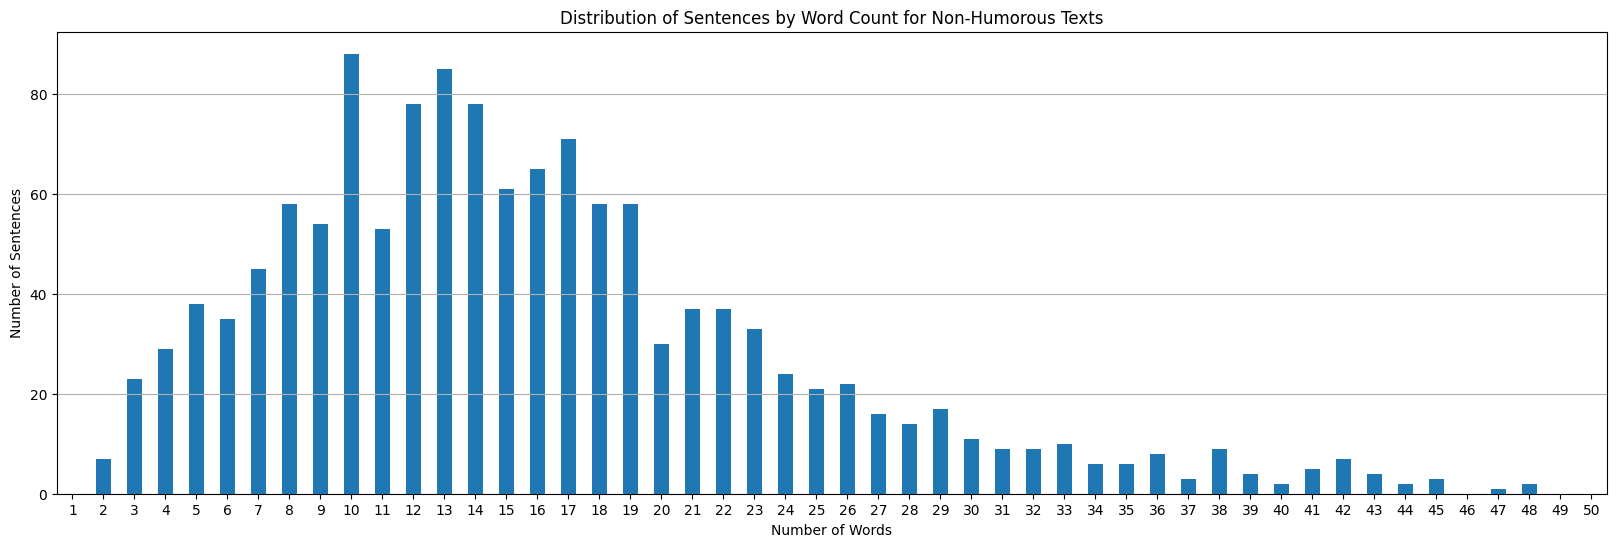

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_label_0 is your DataFrame
df_label_0['word_count'] = df_label_0['Text'].apply(lambda x: len(x.split()))

# Calculate the frequency distribution of word counts
word_count_distribution = df_label_0['word_count'].value_counts().sort_index()
# Filter to show only word counts between 1 and 50
# Create a complete index for word counts from 1 to 50
complete_index = pd.RangeIndex(start=1, stop=51)

# Reindex the distribution to include all counts from 1 to 50, filling missing values with 0
complete_distribution = word_count_distribution.reindex(complete_index, fill_value=0)

# Plot the frequency graph
plt.figure(figsize=(20, 6))
complete_distribution.plot(kind='bar')
# Plot the frequency graph
plt.title('Distribution of Sentences by Word Count for Non-Humorous Texts')
plt.xlabel('Number of Words')
plt.ylabel('Number of Sentences')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


<ipython-input-50-7439c31fb0e9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_label_1['word_count'] = df_label_1['Text'].apply(lambda x: len(x.split()))


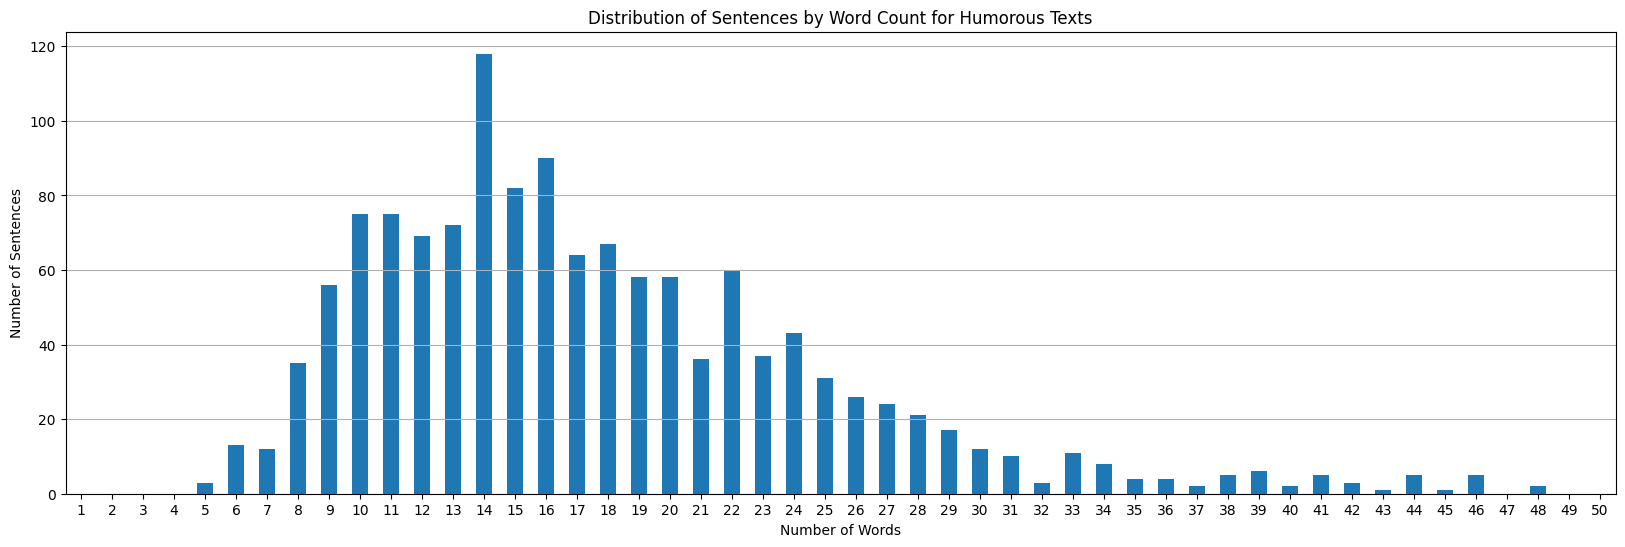

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_label_0 is your DataFrame
df_label_1['word_count'] = df_label_1['Text'].apply(lambda x: len(x.split()))

# Calculate the frequency distribution of word counts
word_count_distribution = df_label_1['word_count'].value_counts().sort_index()
# Filter to show only word counts between 1 and 50
# Create a complete index for word counts from 1 to 50
complete_index = pd.RangeIndex(start=1, stop=51)

# Reindex the distribution to include all counts from 1 to 50, filling missing values with 0
complete_distribution = word_count_distribution.reindex(complete_index, fill_value=0)

# Plot the frequency graph
plt.figure(figsize=(20, 6))
complete_distribution.plot(kind='bar')
plt.title('Distribution of Sentences by Word Count for Humorous Texts')
plt.xlabel('Number of Words')
plt.ylabel('Number of Sentences')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


Distributia punchline-urilor in categorii

<ipython-input-65-7b83207f6de0>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PunchLine_Percentage'] = df.apply(calculate_punchline_percentage, axis=1)
<ipython-input-65-7b83207f6de0>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Category'] = df['PunchLine_Percentage'].apply(categorize_percentage)


Cea mai comună categorie este: 50-75%, cu 720 apariții.
Cea mai putin comună categorie este: 0-25%, cu 20 apariții.


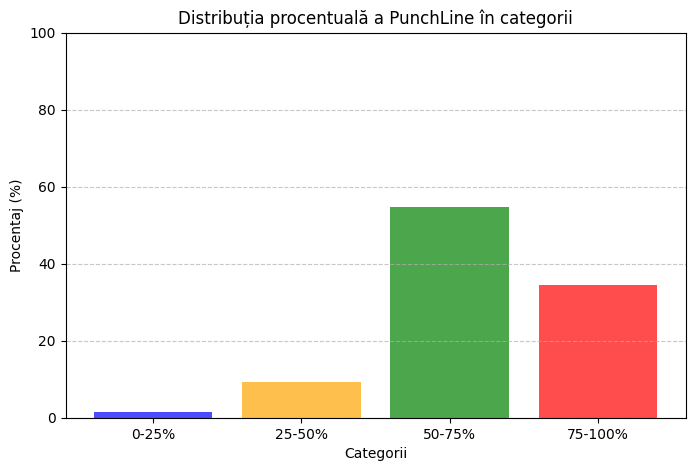

In [ ]:
import pandas as pd

df = df_label_1
# Funcție pentru calculul procentului
def calculate_punchline_percentage(row):
    text, punchline = row['Text'], row['PunchLine']
    start_index = text.find(punchline)
    if start_index == -1:  # Dacă PunchLine nu e găsit
        return None
    return (start_index / len(text)) * 100

# Calculăm procentul pentru fiecare rând
df['PunchLine_Percentage'] = df.apply(calculate_punchline_percentage, axis=1)
vf=[0,0,0,0]
# Clasificăm în categorii
def categorize_percentage(percent):
    if percent is None:
        return "Unknown"
    elif 0 <= percent < 25:
      vf[0]+=1
      return "0-25%"
    elif 25 <= percent < 50:
        vf[1]+=1
        return "25-50%"
    elif 50 <= percent < 75:
        vf[2]+=1
        return "50-75%"
    elif 75 <= percent <= 100:
        vf[3]+=1
        return "75-100%"
    else:
        return "Invalid"

df['Category'] = df['PunchLine_Percentage'].apply(categorize_percentage)
# Calculăm frecvența fiecărei categorii
most_common_category = df['Category'].value_counts().idxmax()
most_common_count = df['Category'].value_counts().max()

least_common_category = df['Category'].value_counts().idxmin()
least_common_count = df['Category'].value_counts().min()

print(f"Cea mai comună categorie este: {most_common_category}, cu {most_common_count} apariții.")
print(f"Cea mai putin comună categorie este: {least_common_category}, cu {least_common_count} apariții.")

percentages = [(100 * count) / sum(vf) for count in vf]
categories = ["0-25%", "25-50%", "50-75%", "75-100%"]
# Creăm graficul
plt.figure(figsize=(8, 5))
plt.bar(categories, percentages, color=['blue', 'orange', 'green', 'red'], alpha=0.7)
plt.xlabel("Categorii")
plt.ylabel("Procentaj (%)")
plt.title("Distribuția procentuală a PunchLine în categorii")
plt.ylim(0, 100)  # Interval pentru procentaje
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Afișăm graficul
plt.show()

In [ ]:
df_label_1

,Text,Label,PunchLine,word_count,char_count
0,"Propun o farsa amuzanta de 1 Aprilie, sa merge...",1,sa ne scoatem toti banii de la banca deodata,24,104
4,Ciinele meu raspunde la toate comenzile. Ăsta ...,1,Ăsta e jobul lui la Pizza Hut Delivery,14,67
5,Ganduri care iti trec prin cap cand sari cu pa...,1,prea tarziu sa spun nu,17,68
8,Fiu-miu insista sa-i citesc din aceeasi si ace...,1,Cred că o să se facă preot.,22,95
11,"McGregor a zis despre Mayweather, inainte de m...",1,"Din fericire pentru el, n-a trebuit să-l vadă ...",32,138
...,...,...,...,...,...
348,Eu cred ca “jucariile educative” chiar funtion...,1,m-am învățat repede minte să nu mai cumpăr.,19,99
350,"De cind am copil mic stiu care e un stegozaur,...",1,și care e cea mai apropiată toaletă în orice m...,24,98
355,"Daca vrei bani fara sa faci nimic, esti lenes....",1,"venit pasiv, esti antreprenor.",15,73
358,Un ciine a facut inconjurul lumii in lesa. A s...,1,A străbătut lumea în lung și-n lat.,15,64


<ipython-input-100-9bb0b7e93421>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PunchLine_Percentage'] = df.apply(calculate_punchline_percentage, axis=1)
<ipython-input-100-9bb0b7e93421>:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Category'] = df['PunchLine_Percentage'].apply(categorize_percentage)


Cea mai comună categorie este: 70-80%, cu 403 apariții.
Cea mai putin comună categorie este: 10-20%, cu 7 apariții.


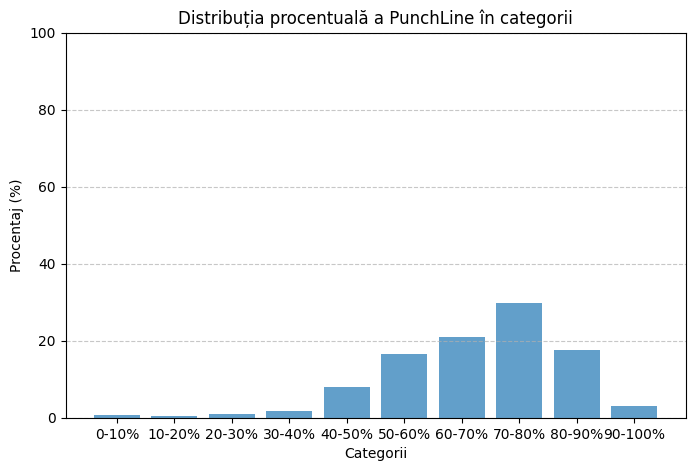

In [ ]:
import pandas as pd
import random
df = df_label_1
# Funcție pentru calculul procentului
def calculate_punchline_percentage(row):
    text, punchline = row['Text'], row['PunchLine']
    start_index = text.find(punchline)
    if start_index == -1:  # Dacă PunchLine nu e găsit
        return None
    return (start_index / len(text)) * 100

# Calculăm procentul pentru fiecare rând
df['PunchLine_Percentage'] = df.apply(calculate_punchline_percentage, axis=1)
vf=[0,0,0,0,0,0,0,0,0,0]
# Clasificăm în categorii
def categorize_percentage(percent):
    if percent is None:
        return "Unknown"
    elif 0 <= percent < 10:
      vf[0]+=1
      return "0-10%"
    elif 10 <= percent < 20:
        vf[1]+=1
        return "10-20%"
    elif 20 <= percent < 30:
        vf[2]+=1
        return "20-30%"
    elif 30 <= percent <= 40:
        vf[3]+=1
        return "30-40%"
    elif 40 <= percent <= 50:
        vf[4]+=1
        return "40-50%"
    elif 50 <= percent < 60:
      vf[5]+=1
      return "50-60%"
    elif 60 <= percent < 70:
        vf[6]+=1
        return "60-70%"
    elif 70 <= percent < 80:
        vf[7]+=1
        return "70-80%"
    elif 80 <= percent <= 90:
        vf[8]+=1
        return "80-90%"
    elif 90 <= percent <= 100:
        vf[9]+=1
        return "90-100%"
    else:
        return "Invalid"

df['Category'] = df['PunchLine_Percentage'].apply(categorize_percentage)
# Calculăm frecvența fiecărei categorii
most_common_category = df['Category'].value_counts().idxmax()
most_common_count = df['Category'].value_counts().max()

least_common_category = df['Category'].value_counts().idxmin()
least_common_count = df['Category'].value_counts().min()

print(f"Cea mai comună categorie este: {most_common_category}, cu {most_common_count} apariții.")
print(f"Cea mai putin comună categorie este: {least_common_category}, cu {least_common_count} apariții.")

percentages = [(100 * count) / sum(vf) for count in vf]
categories = ["0-10%", "10-20%", "20-30%", "30-40%", "40-50%", "50-60%", "60-70%", "70-80%", "80-90%", "90-100%"]
# Creăm graficul
plt.figure(figsize=(8, 5))
plt.bar(categories, percentages, alpha=0.7)
plt.xlabel("Categorii")
plt.ylabel("Procentaj (%)")
plt.title("Distribuția procentuală a PunchLine în categorii")
plt.ylim(0, 100)  # Interval pentru procentaje
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Afișăm graficul
plt.show()

lungimea medie a punch-lineului

In [ ]:
# Funcție pentru a calcula lungimea medie în litere a cuvintelor
def avg_word_length(sentence):
    words = sentence.split()
    total_letters = sum(len(word) for word in words)
    return total_letters / len(words) if words else 0

# Calculăm lungimea medie în litere și numărul mediu de cuvinte
df_label_1['avg_word_length'] = df_label_1['PunchLine'].apply(avg_word_length)
avg_word_count = df_label_1['PunchLine'].apply(lambda x: len(x.split())).mean()

# Afisăm rezultatele
avg_word_length_value = df_label_1['avg_word_length'].mean()

print(f"Lungimea medie a cuvintelor în litere: {avg_word_length_value}")
print(f"Numărul mediu de cuvinte: {avg_word_count}")

Lungimea medie a cuvintelor în litere: 4.418263005472285
Numărul mediu de cuvinte: 5.553663952627683


<ipython-input-94-ab92accb37ac>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_label_1['avg_word_length'] = df_label_1['PunchLine'].apply(avg_word_length)


most common POS PunchLine

<ipython-input-15-0969451a54bb>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_label_1['pos_tags'] = df_label_1['PunchLine'].apply(extract_pos)


Cele mai comune părți de vorbire:
NOUN: 1877
PUNCT: 1442
AUX: 950
PRON: 629
ADJ: 582
ADV: 529
PROPN: 477
VERB: 462
DET: 229
CCONJ: 110
NUM: 89
: 75
PART: 51
ADP: 18
SYM: 7
X: 7
SCONJ: 7
INTJ: 2


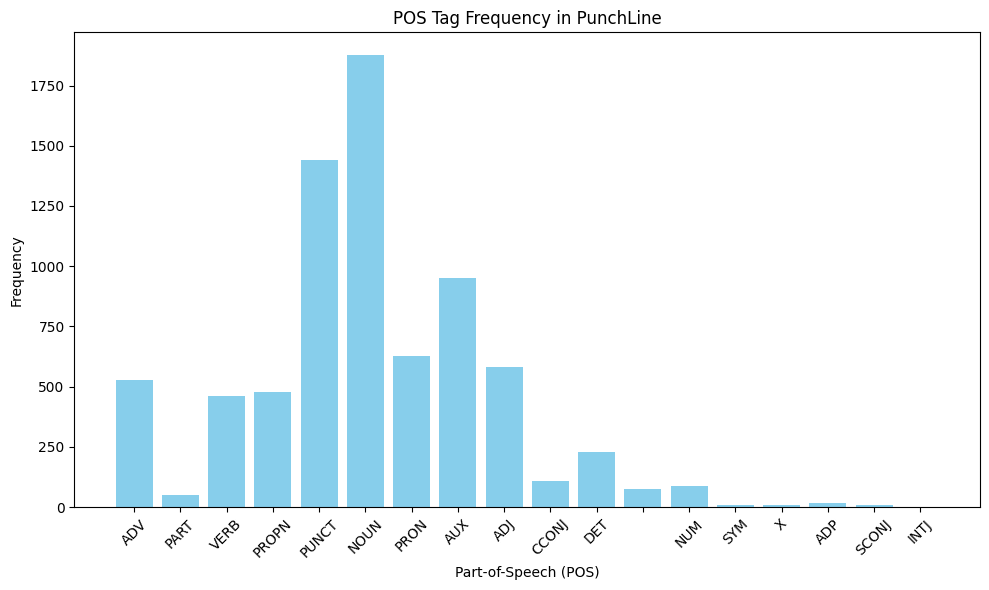

In [ ]:
import spacy
import pandas as pd
from collections import Counter

# Încarcă modelul în limba română
nlp = spacy.load("ro_core_news_sm")


# Funcție pentru a extrage părțile de vorbire dintr-o propoziție
def extract_pos(text):
    doc = nlp(text)
    return [token.pos_ for token in doc]

# Aplicăm funcția pe întreaga coloană 'PunchLine'
df_label_1['pos_tags'] = df_label_1['PunchLine'].apply(extract_pos)

# Calculăm frecvențele părților de vorbire
pos_counts = Counter([pos for sublist in df_label_1['pos_tags'] for pos in sublist])

# Afisăm cele mai comune părți de vorbire
print("Cele mai comune părți de vorbire:")
for pos, count in pos_counts.most_common():
    print(f"{pos}: {count}")

# Plot the frequencies
pos_labels, pos_freq = zip(*pos_counts.items())

plt.figure(figsize=(10, 6))
plt.bar(pos_labels, pos_freq, color='skyblue')
plt.xlabel('Part-of-Speech (POS)')
plt.ylabel('Frequency')
plt.title('POS Tag Frequency in PunchLine')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


Cele mai comune părți de vorbire:
NOUN: 1877
PUNCT: 1442
AUX: 950
PRON: 629
ADJ: 582
ADV: 529
PROPN: 477
VERB: 462
DET: 229
CCONJ: 110
NUM: 89
: 75
PART: 51
ADP: 18
SYM: 7
X: 7
SCONJ: 7
INTJ: 2


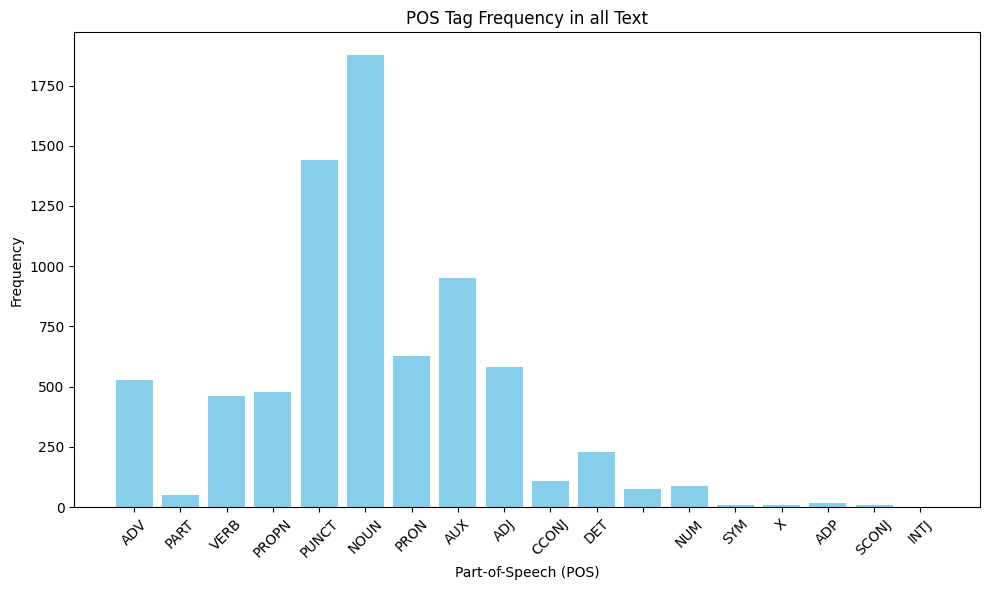

In [ ]:
import spacy
import pandas as pd
from collections import Counter

# Încarcă modelul în limba română
nlp = spacy.load("ro_core_news_sm")


# Funcție pentru a extrage părțile de vorbire dintr-o propoziție
def extract_pos(text):
    doc = nlp(text)
    return [token.pos_ for token in doc]

full_df = pd.concat([df_label_0, df_label_1])

# Aplicăm funcția pe întreaga coloană 'PunchLine'
full_df['pos_tags'] = full_df['Text'].apply(extract_pos)

# Calculăm frecvențele părților de vorbire
pos_counts = Counter([pos for sublist in df_label_1['pos_tags'] for pos in sublist])

# Afisăm cele mai comune părți de vorbire
print("Cele mai comune părți de vorbire:")
for pos, count in pos_counts.most_common():
    print(f"{pos}: {count}")

# Plot the frequencies
pos_labels, pos_freq = zip(*pos_counts.items())

plt.figure(figsize=(10, 6))
plt.bar(pos_labels, pos_freq, color='skyblue')
plt.xlabel('Part-of-Speech (POS)')
plt.ylabel('Frequency')
plt.title('POS Tag Frequency in all Text')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **N-grams**

In [ ]:
# 4. Separarea textului și etichetelor
df_filtered=pd.concat([df_label_0, df_label_1])
X = df_filtered['Text']
y = df_filtered['Label']
df_label_0 = df_filtered[df_filtered['Label'] == 0]
df_label_1 = df_filtered[df_filtered['Label'] == 1]
# 1. Împărțirea setului de date în funcție de etichete (0 și 1)
text_0 = df_label_0  # Subset pentru eticheta 0
text_1 = df_label_1  # Subset pentru eticheta 1

In [ ]:
# Extract the 'Text' column from both DataFrames
text_0 = df_label_0['Text'].dropna().tolist()  # Convert to list and drop NaN
text_1 = df_label_1['Text'].dropna().tolist()  # Convert to list and drop NaN



/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['printr'] not in stop_words.
  warnings.warn(


Top 10 bigrams for Non-Humpr:
               Bigram  Frequency
4978        loc munca         13
8549         stiu fac         12
3113        fac viata         11
7210       pur simplu         11
706       anul trecut         11
6296     parere aveti          8
6321        part time          7
681    anul facultate          6
3179  facultate buget          6
8459       stau camin          6
Top 10 bigrams for Humor
                  Bigram  Frequency
3222             fac sex         14
2116           copil mic         13
1993      conor mcgregor         10
4609          iubita zis          9
3587    floyd mayweather          8
3253            faca sex          8
2093         copiii mici          8
7554         raspund miu          7
3737      gabriela firea          7
7149  primaria capitalei          7


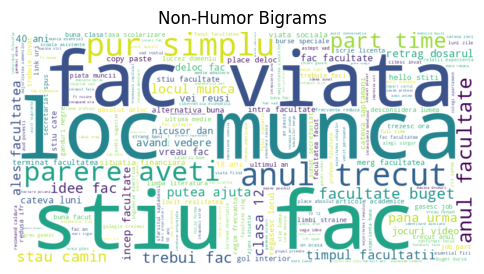

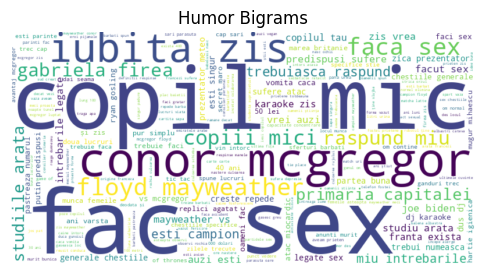

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['printr'] not in stop_words.
  warnings.warn(


Top 10 trigrame pentru eticheta 0:
                          Trigram  Frequency
3698               idee fac viata          4
3359         frecvanta redusa ifr          3
5239          munca esential fiti          3
6878       regim frecvanta redusa          3
2812                 fac an pauza          3
4328                job part time          3
7867          stiu facultate aleg          3
6022          place absolut deloc          3
2837          fac galagie trezesc          3
3709  ideea profesol extraordinar          2
Top 10 trigrame pentru eticheta 1:
                           Trigram  Frequency
8583        trebuiasca raspund miu          7
9193                vrei auzi esti          6
5298        miu intrebarile legate          6
7068       raspund miu intrebarile          6
6992       putin predispusi sufere          5
8196         sufere atac miocardic          5
5022        mayweather vs mcgregor          5
1672  chestiile generale chestiile          5
6604        predispus

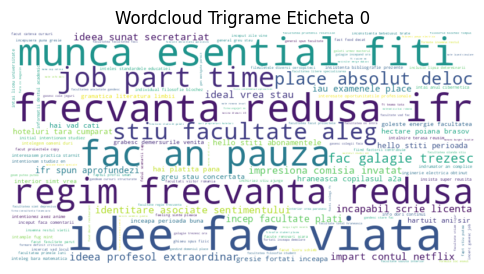

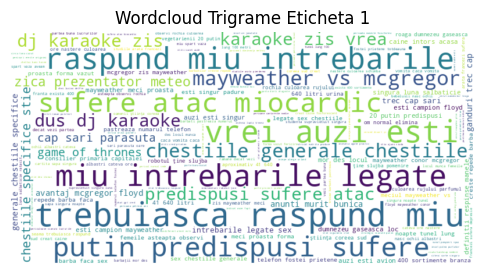

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pandas as pd



# 2. Crearea unui CountVectorizer pentru bigrame
bigram_vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words=romanian_stop_words)

# 3. Analiza bigramelor pentru textul cu eticheta 0
X_bigrams_0 = bigram_vectorizer.fit_transform(text_0)
bigram_frequencies_0 = X_bigrams_0.toarray().sum(axis=0)
bigram_words_0 = bigram_vectorizer.get_feature_names_out()

# 4. Crearea unui DataFrame cu frecvențele bigramelor pentru eticheta 0
bigram_df_0 = pd.DataFrame(list(zip(bigram_words_0, bigram_frequencies_0)), columns=["Bigram", "Frequency"])
bigram_df_0 = bigram_df_0.sort_values(by="Frequency", ascending=False)

# 5. Analiza bigramelor pentru textul cu eticheta 1
X_bigrams_1 = bigram_vectorizer.fit_transform(text_1)
bigram_frequencies_1 = X_bigrams_1.toarray().sum(axis=0)
bigram_words_1 = bigram_vectorizer.get_feature_names_out()

# 6. Crearea unui DataFrame cu frecvențele bigramelor pentru eticheta 1
bigram_df_1 = pd.DataFrame(list(zip(bigram_words_1, bigram_frequencies_1)), columns=["Bigram", "Frequency"])
bigram_df_1 = bigram_df_1.sort_values(by="Frequency", ascending=False)

# 7. Vizualizarea top 10 bigrame pentru eticheta 0
print("Top 10 bigrams for Non-Humpr:")
print(bigram_df_0.head(10))

# 8. Vizualizarea top 10 bigrame pentru eticheta 1
print("Top 10 bigrams for Humor")
print(bigram_df_1.head(10))

# 9. Vizualizarea unui wordcloud pentru bigramele etichetei 0
wordcloud_0 = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(zip(bigram_df_0["Bigram"], bigram_df_0["Frequency"])))
plt.figure(figsize=(6, 4))
plt.imshow(wordcloud_0, interpolation='bilinear')
plt.title("Non-Humor Bigrams")
plt.axis("off")
plt.show()

# 10. Vizualizarea unui wordcloud pentru bigramele etichetei 1
wordcloud_1 = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(zip(bigram_df_1["Bigram"], bigram_df_1["Frequency"])))
plt.figure(figsize=(6, 4))
plt.imshow(wordcloud_1, interpolation='bilinear')
plt.title("Humor Bigrams")
plt.axis("off")
plt.show()

# 11. Crearea unui CountVectorizer pentru trigrame
trigram_vectorizer = CountVectorizer(ngram_range=(3, 3), stop_words=romanian_stop_words)

# 12. Analiza trigramelor pentru textul cu eticheta 0
X_trigrams_0 = trigram_vectorizer.fit_transform(text_0)
trigram_frequencies_0 = X_trigrams_0.toarray().sum(axis=0)
trigram_words_0 = trigram_vectorizer.get_feature_names_out()

# 13. Crearea unui DataFrame cu frecvențele trigramelor pentru eticheta 0
trigram_df_0 = pd.DataFrame(list(zip(trigram_words_0, trigram_frequencies_0)), columns=["Trigram", "Frequency"])
trigram_df_0 = trigram_df_0.sort_values(by="Frequency", ascending=False)

# 14. Analiza trigramelor pentru textul cu eticheta 1
X_trigrams_1 = trigram_vectorizer.fit_transform(text_1)
trigram_frequencies_1 = X_trigrams_1.toarray().sum(axis=0)
trigram_words_1 = trigram_vectorizer.get_feature_names_out()

# 15. Crearea unui DataFrame cu frecvențele trigramelor pentru eticheta 1
trigram_df_1 = pd.DataFrame(list(zip(trigram_words_1, trigram_frequencies_1)), columns=["Trigram", "Frequency"])
trigram_df_1 = trigram_df_1.sort_values(by="Frequency", ascending=False)

# 16. Vizualizarea top 10 trigrame pentru eticheta 0
print("Top 10 trigrame pentru eticheta 0:")
print(trigram_df_0.head(10))

# 17. Vizualizarea top 10 trigrame pentru eticheta 1
print("Top 10 trigrame pentru eticheta 1:")
print(trigram_df_1.head(10))

# 18. Vizualizarea unui wordcloud pentru trigramele etichetei 0
wordcloud_0 = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(zip(trigram_df_0["Trigram"], trigram_df_0["Frequency"])))
plt.figure(figsize=(6, 4))
plt.imshow(wordcloud_0, interpolation='bilinear')
plt.title("Wordcloud Trigrame Eticheta 0")
plt.axis("off")
plt.show()

# 19. Vizualizarea unui wordcloud pentru trigramele etichetei 1
wordcloud_1 = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(zip(trigram_df_1["Trigram"], trigram_df_1["Frequency"])))
plt.figure(figsize=(6, 4))
plt.imshow(wordcloud_1, interpolation='bilinear')
plt.title("Wordcloud Trigrame Eticheta 1")
plt.axis("off")
plt.show()


# **POS-taging**

In [ ]:
!pip install spacy
!python -m spacy download ro_core_news_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 107.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('ro_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


Cele mai comune substantive pentru clasa 0:
[('facultatea', 79), ('ani', 52), ('timp', 48), ('viata', 46), ('loc', 38), ('munca', 36), ('persoane', 30), ('facultate', 28), ('fata', 28), ('pana', 28)]

Cele mai comune substantive pentru clasa 1:
[('ani', 59), ('copil', 57), ('sex', 53), ('viata', 46), ('oamenii', 42), ('om', 41), ('femeile', 38), ('oameni', 37), ('casa', 33), ('niciodata', 32)]

Cele mai comune verbe pentru clasa 0:
[('dat', 45), ('avut', 42), ('facut', 42), ('trebuie', 42), ('zis', 30), ('stau', 28), ('spus', 28), ('inceput', 27), ('trebui', 26), ('vazut', 26)]

Cele mai comune verbe pentru clasa 1:
[('zis', 51), ('trebuie', 45), ('dat', 42), ('luat', 35), ('putea', 34), ('spus', 28), ('atit', 27), ('facut', 26), ('esti', 24), ('trebui', 24)]


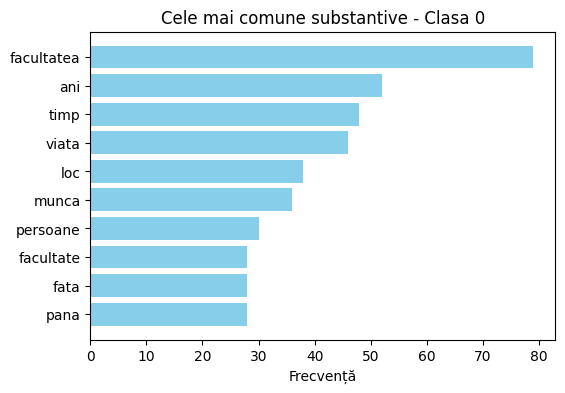

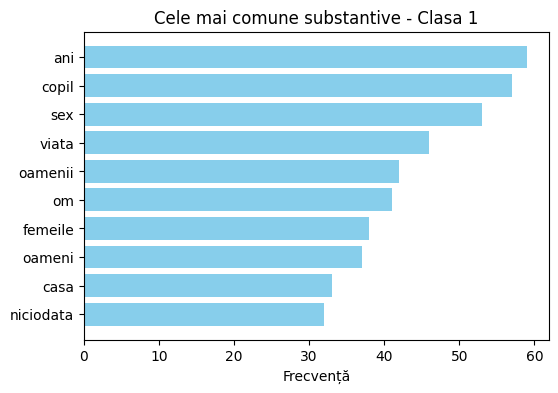

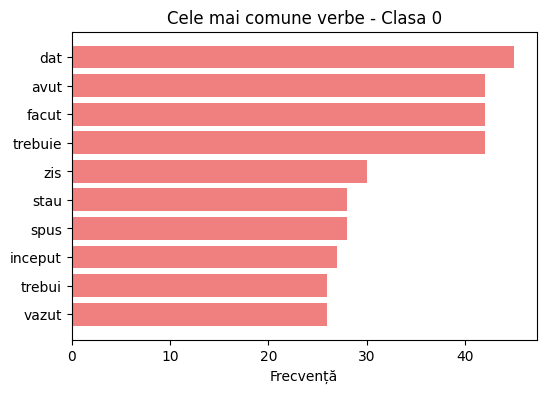

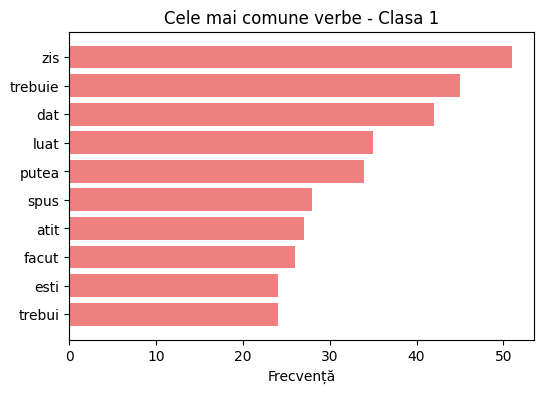

In [ ]:
import spacy
from collections import Counter
import matplotlib.pyplot as plt

# Încărcarea modelului pre-antrenat spaCy pentru limba română
nlp = spacy.load("ro_core_news_sm")

# Funcția pentru a extrage substantivele dintr-un text
def extract_nouns(text):
    doc = nlp(text)
    return [token.text.lower() for token in doc if token.pos_ == "NOUN"]

# Funcția pentru a extrage verbele dintr-un text
def extract_verbs(text):
    doc = nlp(text)
    return [token.text.lower() for token in doc if token.pos_ == "VERB"]

# 1. Extrage substantivele și verbele pentru fiecare subset de text
# Definirea cuvintelor de eliminat
eliminare_cuvinte = ["an", "anul"]

# Extrage substantivele și verbele din text_0 și text_1, eliminând "an" și "anul"
nouns_0 = [noun for text in text_0 for noun in extract_nouns(text) if noun.lower() not in eliminare_cuvinte]
nouns_1 = [noun for text in text_1 for noun in extract_nouns(text) if noun.lower() not in eliminare_cuvinte]

verbs_0 = [verb for text in text_0 for verb in extract_verbs(text)]
verbs_1 = [verb for text in text_1 for verb in extract_verbs(text)]

# 2. Calculează frecvența substantivelor și verbelor
noun_freq_0 = Counter(nouns_0)
noun_freq_1 = Counter(nouns_1)

verb_freq_0 = Counter(verbs_0)
verb_freq_1 = Counter(verbs_1)

# 3. Afișează cele mai comune substantive și verbe pentru fiecare clasă
print("Cele mai comune substantive pentru clasa 0:")
print(noun_freq_0.most_common(10))

print("\nCele mai comune substantive pentru clasa 1:")
print(noun_freq_1.most_common(10))

print("\nCele mai comune verbe pentru clasa 0:")
print(verb_freq_0.most_common(10))

print("\nCele mai comune verbe pentru clasa 1:")
print(verb_freq_1.most_common(10))

# 4. Vizualizare grafică pentru cele mai comune substantive
def plot_most_common_nouns(noun_freq, title):
    most_common = noun_freq.most_common(10)
    nouns, freqs = zip(*most_common)

    plt.figure(figsize=(6,4))
    plt.barh(nouns, freqs, color='skyblue')
    plt.xlabel('Frecvență')
    plt.title(title)
    plt.gca().invert_yaxis()  # Pentru a avea cuvântul cel mai frecvent în partea de sus
    plt.show()

# Vizualizare grafică pentru cele mai comune verbe
def plot_most_common_verbs(verb_freq, title):
    most_common = verb_freq.most_common(10)
    verbs, freqs = zip(*most_common)

    plt.figure(figsize=(6,4))
    plt.barh(verbs, freqs, color='lightcoral')
    plt.xlabel('Frecvență')
    plt.title(title)
    plt.gca().invert_yaxis()  # Pentru a avea verbul cel mai frecvent în partea de sus
    plt.show()

# 5. Afișează graficele pentru fiecare clasă
plot_most_common_nouns(noun_freq_0, "Cele mai comune substantive - Clasa 0")
plot_most_common_nouns(noun_freq_1, "Cele mai comune substantive - Clasa 1")

plot_most_common_verbs(verb_freq_0, "Cele mai comune verbe - Clasa 0")
plot_most_common_verbs(verb_freq_1, "Cele mai comune verbe - Clasa 1")


# **Detectare parte amuzanta**

In [ ]:
import pandas as pd
import numpy as np
from typing import List, Dict, Tuple
from sklearn.model_selection import train_test_split
from transformers import AutoTokenizer, RobertaForTokenClassification
import torch

class RomanianPunchlinePreprocessor:
    def __init__(
        self,
        tokenizer_path: str = "/content/RoBERT_model_humor_classification_tokenizer",
        max_length: int = 512
    ):

        # Load Romanian tokenizer from the specified path
        self.tokenizer = AutoTokenizer.from_pretrained(tokenizer_path)
        self.max_length = max_length


    def prepare_labels(
        self,
        text: str,
        punchline: str
    ) -> Dict[str, torch.Tensor]:

        # Tokenize text with both input sequences
        encodings = self.tokenizer(
            text,
            text_pair=punchline,  # Add punchline as a second sequence
            truncation=True,
            max_length=self.max_length,
            padding='max_length',
            return_tensors='pt'
        )

        # Initialize labels (0 for non-punchline, 1 for punchline)
        labels = torch.zeros(
            encodings['input_ids'].shape,
            dtype=torch.long
        )

        # Tokenize full text and punchline separately for precise matching
        full_tokens = self.tokenizer.tokenize(text)
        punchline_tokens = self.tokenizer.tokenize(punchline)

        try:
            # Find the start index of punchline tokens
            start_idx = self._find_sublist_index(full_tokens, punchline_tokens)

            if start_idx is not None:
                # Map token indices to input_ids indices
                decoded_tokens = self.tokenizer.convert_ids_to_tokens(
                    encodings['input_ids'][0]
                )

                # Mark punchline tokens
                for i in range(start_idx, start_idx + len(punchline_tokens)):
                    try:
                        label_idx = decoded_tokens.index(full_tokens[i])
                        labels[0][label_idx] = 1
                    except ValueError:
                        # Token not found (might be due to splitting)
                        continue
        except TypeError:
            # If punchline not found, keep all labels as 0
            pass

        return {
            'input_ids': encodings['input_ids'],
            'attention_mask': encodings['attention_mask'],
            'labels': labels
        }

    def _find_sublist_index(
        self,
        full_list: List[str],
        sublist: List[str]
    ) -> int:

        for i in range(len(full_list) - len(sublist) + 1):
            if full_list[i:i+len(sublist)] == sublist:
                return i
        return None

    def preprocess_dataset(
        self,
        csv_path: str,
        test_size: float = 0.2,
        random_state: int = 42
    ) -> Tuple[List[Dict[str, torch.Tensor]], List[Dict[str, torch.Tensor]]]:

        # Read CSV
        df = pd.read_csv(csv_path)
        df=df[df['Label']==1]
        # Validate columns
        required_columns = ['Text', 'PunchLine']
        for col in required_columns:
            if col not in df.columns:
                raise ValueError(f"Missing required column: {col}")

        # Prepare dataset
        processed_data = [
            self.prepare_labels(
                str(row['Text']),  # Ensure string type
                str(row['PunchLine'])  # Ensure string type
            )
            for _, row in df.iterrows()
        ]

        # Split dataset
        train_data, test_data = train_test_split(
            processed_data,
            test_size=test_size,
            random_state=random_state
        )

        return train_data, test_data

# Example usage
if __name__ == "__main__":
    try:
        # Initialize preprocessor
        preprocessor = RomanianPunchlinePreprocessor()

        # Preprocess dataset
        df_train=pd.read_csv('df_train.csv')
        df_train=df_train[df_train['Label']==1]
        df_val=pd.read_csv('df_validation.csv')
        df_val=df_val[df_val['Label']==1]
        df_test=pd.read_csv('df_test.csv')
        df_test=df_test[df_test['Label']==1]
        full_df = pd.concat([df_train, df_val, df_test])
        full_df.to_csv('full_df.csv', index=False)
        train_data, test_data = preprocessor.preprocess_dataset('full_df.csv')

        print("Data preprocessed successfully!")
        print(f"Training samples: {len(train_data)}")
        print(f"Testing samples: {len(test_data)}")

        # Optional: Check a sample processed item
        if train_data:
            sample = train_data[0]
            print("\nSample processed item:")
            print("Input IDs shape:", sample['input_ids'].shape)
            print("Labels shape:", sample['labels'].shape)
            print("Positive labels:", torch.sum(sample['labels']))

    except Exception as e:
        print(f"Error preprocessing data: {e}")
        import traceback
        traceback.print_exc()

Error preprocessing data: [Errno 2] No such file or directory: 'df_train.csv'


Traceback (most recent call last):
  File "<ipython-input-14-e0ff17618ed0>", line 160, in <cell line: 0>
    df_train=pd.read_csv('df_train.csv')
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pandas/io/parsers/readers.py", line 1026, in read_csv
    return _read(filepath_or_buffer, kwds)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pandas/io/parsers/readers.py", line 620, in _read
    parser = TextFileReader(filepath_or_buffer, **kwds)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pandas/io/parsers/readers.py", line 1620, in __init__
    self._engine = self._make_engine(f, self.engine)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pandas/io/parsers/readers.py", line 1880, in _make_engine
    self.handles = get_handle(
                   ^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-

In [ ]:
!pip install torch transformers scikit-learn

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
from scipy.spatial.distance import cosine
import numpy as np
from nltk.metrics.distance import edit_distance

from transformers import (
    AutoModelForTokenClassification,
    AutoTokenizer,
    AdamW,
    get_linear_schedule_with_warmup
)
from sklearn.metrics import classification_report
import numpy as np

class PunchlineDataset(Dataset):
    def __init__(self, data):

        self.data = data

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return {
            'input_ids': self.data[idx]['input_ids'].squeeze(),
            'attention_mask': self.data[idx]['attention_mask'].squeeze(),
            'labels': self.data[idx]['labels'].squeeze()
        }

class RoBERTaPunchlineTrainer:
    def __init__(
        self,
        model_path: str = "/content/RoBERT_model_humor_classification",
        tokenizer_path: str = "/content/RoBERT_model_humor_classification_tokenizer",
        num_labels: int = 2,
        learning_rate: float = 2e-5,
        epochs: int = 5,
        batch_size: int = 16
    ):
        """
        Initialize RoBERTa model for punchline location using local model and tokenizer.

        Args:
            model_path (str): Local path to the trained model
            tokenizer_path (str): Local path to the tokenizer
            num_labels (int): Number of label classes (typically 2 for binary classification)
            learning_rate (float): Learning rate for training
            epochs (int): Number of training epochs
            batch_size (int): Training batch size
        """
        # Device configuration
        self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

        # Load tokenizer and model from local path
        self.tokenizer = AutoTokenizer.from_pretrained(tokenizer_path)
        self.model = AutoModelForTokenClassification.from_pretrained(
            model_path,
            num_labels=num_labels
        ).to(self.device)

        # Training hyperparameters
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.batch_size = batch_size


    def train(self, train_data, val_data=None):
        """
        Train the RoBERTa model for punchline location

        Args:
            train_data (List[Dict]): Training dataset
            val_data (List[Dict], optional): Validation dataset
        """
        # Create datasets and dataloaders
        train_dataset = PunchlineDataset(train_data)
        train_loader = DataLoader(
            train_dataset,
            batch_size=self.batch_size,
            shuffle=True
        )

        # Prepare optimizer and schedule
        optimizer = AdamW(
            self.model.parameters(),
            lr=self.learning_rate
        )
        total_steps = len(train_loader) * self.epochs
        scheduler = get_linear_schedule_with_warmup(
            optimizer,
            num_warmup_steps=0,
            num_training_steps=total_steps
        )

        # Training loop
        self.model.train()
        for epoch in range(self.epochs):
            total_loss = 0

            for batch in train_loader:
                # Move batch to device
                input_ids = batch['input_ids'].to(self.device)
                attention_mask = batch['attention_mask'].to(self.device)
                labels = batch['labels'].to(self.device)

                # Zero gradients
                self.model.zero_grad()

                # Forward pass
                outputs = self.model(
                    input_ids,
                    attention_mask=attention_mask,
                    labels=labels
                )
                loss = outputs.loss
                total_loss += loss.item()

                # Backward pass and optimization
                loss.backward()
                torch.nn.utils.clip_grad_norm_(self.model.parameters(), 1.0)
                optimizer.step()
                scheduler.step()

            # Print epoch summary
            avg_loss = total_loss / len(train_loader)
            print(f"Epoch {epoch+1}/{self.epochs}, Loss: {avg_loss:.4f}")

        print("Training completed!")

    def evaluate(self, test_data):

        test_dataset = PunchlineDataset(test_data)
        test_loader = DataLoader(
            test_dataset,
            batch_size=self.batch_size,
            shuffle=False
        )

        # Evaluation mode
        self.model.eval()

        all_preds = []
        all_labels = []
        cosine_similarities = []
        edit_distances = []
        vectorizer = TfidfVectorizer()

        with torch.no_grad():
            for batch in test_loader:
                input_ids = batch['input_ids'].to(self.device)
                attention_mask = batch['attention_mask'].to(self.device)
                labels = batch['labels'].to(self.device)

                # Get predictions
                outputs = self.model(
                    input_ids,
                    attention_mask=attention_mask
                )
                preds = torch.argmax(outputs.logits, dim=-1)

                # Collect predictions and labels
                all_preds.extend(preds.cpu().numpy())
                all_labels.extend(labels.cpu().numpy())

                # Calculate Cosine Similarity and Edit Distance
                for i in range(len(labels)):
                    real_punchline = self.tokenizer.decode(input_ids[i][labels[i] == 1], skip_special_tokens=True)
                    predicted_punchline = self.tokenizer.decode(input_ids[i][preds[i] == 1], skip_special_tokens=True)

                    # Handle empty strings
                    if not real_punchline or not predicted_punchline:
                        cosine_similarities.append(0)
                        edit_distances.append(0)
                        continue

                    try:
                        # Calculate Cosine Similarity
                        tfidf_matrix = vectorizer.fit_transform([real_punchline, predicted_punchline])
                        cosine_sim = 1 - cosine(tfidf_matrix.toarray()[0], tfidf_matrix.toarray()[1])
                        cosine_similarities.append(cosine_sim)

                        # Calculate Edit Distance
                        ed_dist = edit_distance(real_punchline, predicted_punchline)
                        edit_distances.append(ed_dist)
                    except Exception as e:
                        print(f"Error processing similarity metrics: {e}")
                        print(f"Real punchline: {real_punchline}")
                        print(f"Predicted punchline: {predicted_punchline}")
                        cosine_similarities.append(0)
                        edit_distances.append(0)

        # Calculate confusion matrix and classification report
        flat_preds = np.array(all_preds).flatten()
        flat_labels = np.array(all_labels).flatten()

        report = classification_report(flat_labels, flat_preds)

        # Calculate averages, handling empty lists
        avg_cosine_similarity = np.mean(cosine_similarities) if cosine_similarities else 0
        avg_edit_distance = np.mean(edit_distances) if edit_distances else 0

        print(f"Average Cosine Similarity: {avg_cosine_similarity:.4f}")
        print(f"Average Edit Distance: {avg_edit_distance:.4f}")

        return report, avg_cosine_similarity, avg_edit_distance
    def save_model(self, save_path: str = './punchline_robert_model'):
        """
        Save trained model and tokenizer

        Args:
            save_path (str): Directory to save model
        """
        self.model.save_pretrained(save_path)
        self.tokenizer.save_pretrained(save_path)
        print(f"Model saved to {save_path}")

# Example usage
if __name__ == "__main__":

    # Preprocess data
    preprocessor = RomanianPunchlinePreprocessor()
    df_train=pd.read_csv('/content/drive/MyDrive/FoundationsNLP/df_train.csv')
    df_train=df_train[df_train['Label']==1]
    df_val=pd.read_csv('/content/drive/MyDrive/FoundationsNLP/df_validation.csv')
    df_val=df_val[df_val['Label']==1]
    df_test=pd.read_csv('/content/drive/MyDrive/FoundationsNLP/df_test.csv')
    df_test=df_test[df_test['Label']==1]
    full_df = pd.concat([df_train, df_val, df_test])
    full_df.to_csv('/content/drive/MyDrive/FoundationsNLP/full_df.csv', index=False)
    train_data, test_data = preprocessor.preprocess_dataset('/content/drive/MyDrive/FoundationsNLP/full_df.csv')

    # Initialize and train model
    trainer = RoBERTaPunchlineTrainer()

    # Train the model
    trainer.train(train_data)

    # Evaluate performance
    print("\nModel Evaluation:")
    eval_report, avg_cosine_similarity, avg_edit_distance = trainer.evaluate(test_data)
    print(eval_report)

    # Save the model
    trainer.save_model()

/usr/local/lib/python3.11/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1/5, Loss: 0.0509
Epoch 2/5, Loss: 0.0121
Epoch 3/5, Loss: 0.0073
Epoch 4/5, Loss: 0.0053
Epoch 5/5, Loss: 0.0045
Training completed!

Model Evaluation:
Average Cosine Similarity: 0.9511
Average Edit Distance: 2.9114
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    136364
           1       0.93      0.96      0.94      2388

    accuracy                           1.00    138752
   macro avg       0.96      0.98      0.97    138752
weighted avg       1.00      1.00      1.00    138752

Model saved to ./punchline_robert_model


In [ ]:
    # Evaluate performance
    print("\nModel Evaluation:")
    eval_report, avg_cosine_similarity, avg_edit_distance = trainer.evaluate(test_data)
    print(eval_report)

    # Save the model
    trainer.save_model()


Model Evaluation:


ValueError: not enough values to unpack (expected 3, got 2)

In [ ]:
import torch
from transformers import AutoTokenizer, AutoModelForTokenClassification
import numpy as np
import numpy as np
import logging
class PunchlineInferencePipeline:
    def __init__(
        self,
        model_path: str = '/content/punchline_robert_model'
    ):
        """
        Initialize inference pipeline for punchline location
        """
        # Configure logging
        logging.basicConfig(level=logging.DEBUG)
        self.logger = logging.getLogger(__name__)

        # Device configuration
        self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

        try:
            # Try to load saved model first
            self.tokenizer = AutoTokenizer.from_pretrained(model_path)
            self.model = AutoModelForTokenClassification.from_pretrained(model_path).to(self.device)
            self.logger.info(f"Loaded model from {model_path}")
        except Exception as e:
            # Fallback to pre-trained model if no saved model found
            self.logger.warning(f"No saved model found. Using pre-trained model. Error: {e}")
            self.tokenizer = AutoTokenizer.from_pretrained(model_name)
            self.model = AutoModelForTokenClassification.from_pretrained(
                model_name,
                num_labels=2
            ).to(self.device)

        # Set model to evaluation mode
        self.model.eval()

    def predict_punchline(
        self,
        text: str,
        threshold: float = 0.5
    ) -> dict:
        """
        Predict punchline location in the given text with detailed logging
        """
        # Log input details
        self.logger.debug(f"Input text: {text}")

        # Tokenize input with verbose logging
        encodings = self.tokenizer(
            text,
            truncation=True,
            max_length=512,
            padding='max_length',
            return_tensors='pt'
        )

        # Log tokenization details
        tokens = self.tokenizer.convert_ids_to_tokens(encodings['input_ids'][0])
        self.logger.debug(f"Total tokens: {len(tokens)}")
        self.logger.debug(f"Tokens: {tokens}")

        # Move to device
        input_ids = encodings['input_ids'].to(self.device)
        attention_mask = encodings['attention_mask'].to(self.device)

        # Get predictions with error handling
        try:
            with torch.no_grad():
                outputs = self.model(input_ids, attention_mask=attention_mask)
                logits = outputs.logits.cpu().numpy()[0]

            # Log raw logits
            self.logger.debug(f"Raw logits shape: {logits.shape}")

            # Convert logits to probabilities
            probabilities = torch.softmax(torch.tensor(logits), dim=-1).numpy()

            # Log probabilities
            self.logger.debug(f"Probabilities shape: {probabilities.shape}")
            self.logger.debug(f"Sample probabilities: {probabilities[:10]}")

            # Get punchline probabilities (second column)
            punchline_probs = probabilities[:, 1]

            # Extract punchline tokens
            punchline_tokens = []
            punchline_indices = []
            for i, (token, prob) in enumerate(zip(tokens, punchline_probs)):
                if prob > threshold and token not in ['[PAD]', '[CLS]', '[SEP]']:
                    punchline_tokens.append(token)
                    punchline_indices.append(i)

            # Log punchline extraction details
            self.logger.debug(f"Punchline tokens: {punchline_tokens}")
            self.logger.debug(f"Punchline indices: {punchline_indices}")

            # Reconstruct punchline
            if punchline_tokens:
                full_punchline = self.tokenizer.decode(
                    self.tokenizer.convert_tokens_to_ids(punchline_tokens)
                )
            else:
                full_punchline = ""
                self.logger.warning("No punchline tokens found above threshold")

            return {
                'text': text,
                'punchline_tokens': punchline_tokens,
                'punchline_indices': punchline_indices,
                'punchline': full_punchline.strip(),
                'punchline_probabilities': punchline_probs[punchline_indices].tolist() if punchline_indices else []
            }

        except Exception as e:
            self.logger.error(f"Error in prediction: {e}")
            raise

    def interactive_predict(self):
        """
        Interactive prediction interface with detailed logging
        """
        while True:
            # Get user input
            text = input("\nEnter a text to find the punchline (or 'quit' to exit): ")

            # Check for exit
            if text.lower() == 'quit':
                break

            try:
                # Predict punchline with full logging
                result = self.predict_punchline(text, threshold=0.1)  # Lower threshold for debugging

                # Display results
                print("\n--- Punchline Prediction ---")
                print("Predicted Punchline:", result['punchline'])
                print("Punchline Tokens:", result['punchline_tokens'])
                print("Token Probabilities:", result['punchline_probabilities'])
                print("Punchline Indices:", result['punchline_indices'])

            except Exception as e:
                print(f"Error processing text: {e}")


In [ ]:

# Example usage
if __name__ == "__main__":
    # Create inference pipeline
    pipeline = PunchlineInferencePipeline()

    # Start interactive prediction
    pipeline.interactive_predict()


Enter a text to find the punchline (or 'quit' to exit): Cum se numeste un caine sarac? Saracutu'!



--- Punchline Prediction ---
Predicted Punchline: 
Punchline Tokens: []
Token Probabilities: []
Punchline Indices: []

Enter a text to find the punchline (or 'quit' to exit): De ce si-a rupt mana un profesor de matematica? Fiindca a cazut pe ganduri!



--- Punchline Prediction ---
Predicted Punchline: 
Punchline Tokens: []
Token Probabilities: []
Punchline Indices: []

Enter a text to find the punchline (or 'quit' to exit): Cum numesti un caine care chiuie? Chiuaua!

--- Punchline Prediction ---
Predicted Punchline: ##ua
Punchline Tokens: ['##ua']
Token Probabilities: [0.10924520343542099]
Punchline Indices: [12]

Enter a text to find the punchline (or 'quit' to exit): Ce face un profesor de matematica gay cu 2 elevi gay? Fractii de 2 pe 1!

--- Punchline Prediction ---
Predicted Punchline: de gay 2
Punchline Tokens: ['de', 'gay', '2']
Token Probabilities: [0.7798650860786438, 0.7826361656188965, 0.7914635539054871]
Punchline Indices: [5, 7, 9]


KeyboardInterrupt: Interrupted by user

# **K-means**

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
data = pd.concat([df_label_0, df_label_1])
data['Label'].values

array([0, 0, 0, ..., 1, 1, 1])

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


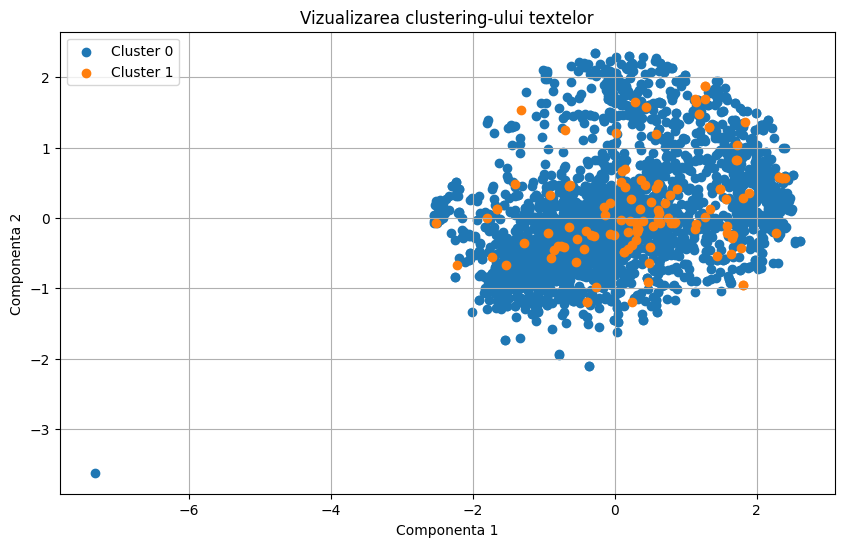

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
texte = pd.concat([df_label_0['Text'], df_label_1['Text']])

# 2. Preprocesarea textului
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import RomanianStemmer

def preprocess(text):
    text = text.lower()
    text = re.sub(r'[^a-zăîâșț]', ' ', text)  # Elimină caractere speciale
    words = word_tokenize(text)
    stop_words = set(stopwords.words('romanian'))
    words = [word for word in words if word not in stop_words]
    stemmer = RomanianStemmer()
    words = [stemmer.stem(word) for word in words]
    return ' '.join(words)

texte_prelucrate = texte.apply(preprocess)

# 3. Reprezentarea cu TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(texte_prelucrate)

# 4. Clustering cu K-means
kmeans = KMeans(n_clusters=2, random_state=42)
labels = kmeans.fit_predict(X)

# 5. Reducerea dimensiunii pentru vizualizare (PCA sau t-SNE)
# Alege între PCA sau t-SNE
use_tsne = True  # Schimbă în False pentru PCA

if use_tsne:
    reducer = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=300)
else:
    reducer = PCA(n_components=2)

X_reduced = reducer.fit_transform(X.toarray())

# 6. Vizualizarea rezultatelor
plt.figure(figsize=(10, 6))
for cluster in range(2):  # Clusterele sunt 0 și 1
    plt.scatter(
        X_reduced[labels == cluster, 0],
        X_reduced[labels == cluster, 1],
        label=f"Cluster {cluster}"
    )

plt.title("Vizualizarea clustering-ului textelor")
plt.xlabel("Componenta 1")
plt.ylabel("Componenta 2")
plt.legend()
plt.grid(True)
plt.show()


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/397k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/500M [00:00<?, ?B/s]

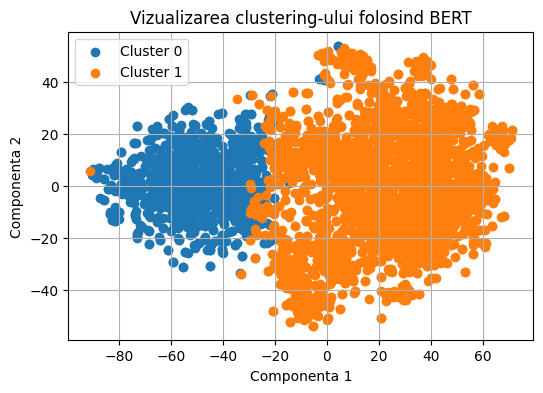

In [ ]:
import pandas as pd
import torch
from transformers import BertTokenizer, BertModel
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, calinski_harabasz_score
# 2. Încarcă modelul BERT pentru limba română
model_name = "dumitrescustefan/bert-base-romanian-cased-v1"
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertModel.from_pretrained(model_name)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# 3. Extrage embeddings din BERT
def get_bert_embeddings(text):
    # Tokenizare și codificare
    tokens = tokenizer(
        text,
        return_tensors="pt",
        padding=True,
        truncation=True,
        max_length=128
    ).to(device)

    # Obține embeddings din model
    with torch.no_grad():
        outputs = model(**tokens)

    # Extrage CLS token embedding (vectorul reprezentativ pentru text)
    cls_embedding = outputs.last_hidden_state[:, 0, :].squeeze().cpu().numpy()
    return cls_embedding

# Aplica funcția pe toate textele
embeddings = [get_bert_embeddings(text) for text in texte]

# 4. Clustering cu K-means
kmeans = KMeans(n_clusters=2, random_state=42)
labels = kmeans.fit_predict(embeddings)

silhouette_avg = silhouette_score(embeddings, labels)
calinski_harabasz = calinski_harabasz_score(embeddings, labels)

import numpy as np
embeddings = np.array(embeddings)
# 5. Reducerea dimensiunii pentru vizualizare (t-SNE)
reducer = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=300)
reducer = TSNE()
embeddings_reduced = reducer.fit_transform(embeddings)

# 6. Vizualizarea clustering-ului
plt.figure(figsize=(6, 4))
for cluster in range(2):  # Clusterele sunt 0 și 1
    plt.scatter(
        embeddings_reduced[labels == cluster, 0],
        embeddings_reduced[labels == cluster, 1],
        label=f"Cluster {cluster}"
    )

plt.title("Vizualizarea clustering-ului folosind BERT")
plt.xlabel("Componenta 1")
plt.ylabel("Componenta 2")
plt.legend()
plt.grid(True)
plt.show()

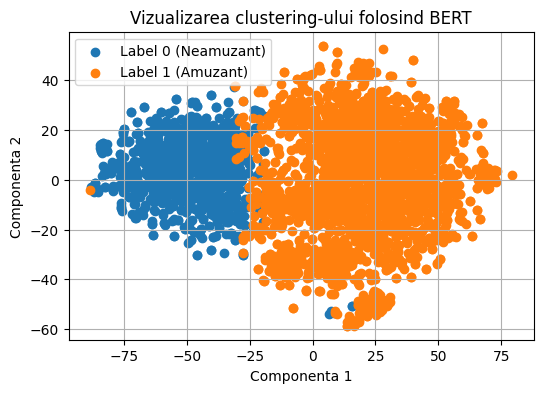

In [ ]:
reducer = TSNE(n_components=2, random_state=42, perplexity=7, n_iter=50)
reducer = TSNE()
embeddings_reduced = reducer.fit_transform(embeddings)

# 6. Vizualizarea clustering-ului
plt.figure(figsize=(6, 4))
for cluster in range(2):  # Clusterele sunt 0 și 1
    plt.scatter(
        embeddings_reduced[labels == cluster, 0],
        embeddings_reduced[labels == cluster, 1],
        label=f"Label {cluster} ({'Amuzant' if cluster == 1 else 'Neamuzant'})",

    )

plt.title("Vizualizarea clustering-ului folosind BERT")
plt.xlabel("Componenta 1")
plt.ylabel("Componenta 2")
plt.legend()
plt.grid(True)
plt.show()

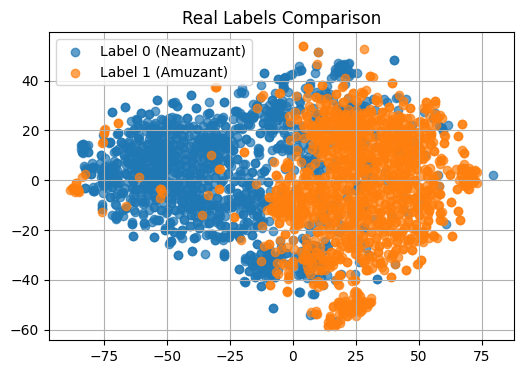

In [ ]:
# 6. Vizualizarea cu etichete reale
real_labels = data['Label'].values  # Extrage etichetele reale (0 sau 1)

plt.figure(figsize=(6, 4))
for label in range(2):  # Etichetele reale sunt 0 și 1
    plt.scatter(
        embeddings_reduced[real_labels == label, 0],
        embeddings_reduced[real_labels == label, 1],
        label=f"Label {label} ({'Amuzant' if label == 1 else 'Neamuzant'})",
        alpha=0.7
    )

plt.title("Real Labels Comparison")
#plt.xlabel("Componenta 1")
#plt.ylabel("Componenta 2")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
texte

,Text
20,"Mi- trimis OP fals , amicu meu lasat laptopu a..."
22,M- am reintors anul urmator facultate normal a...
23,Situatia mea financiara devine dificila am nev...
24,Cineva poate ajuta sfat recomandare ? As fi fo...
25,"cat construiesti multa infrastructura masini ,..."
...,...
288,prieten se lauda e atat bun prostituata i- dat...
289,"orgasm obisnuit arde 112 calorii , orgasm mima..."
291,Am intrebat -o e filmul ei preferat mi- zis Fi...
296,Am rabla cabrio mama ei . E masina decaplorabi...


K-means Clustering Scores:
Silhouette Score: 0.037
Calinski-Harabasz Score: 88.099

GMM Clustering Scores:
Silhouette Score: 0.058
Calinski-Harabasz Score: 86.258


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


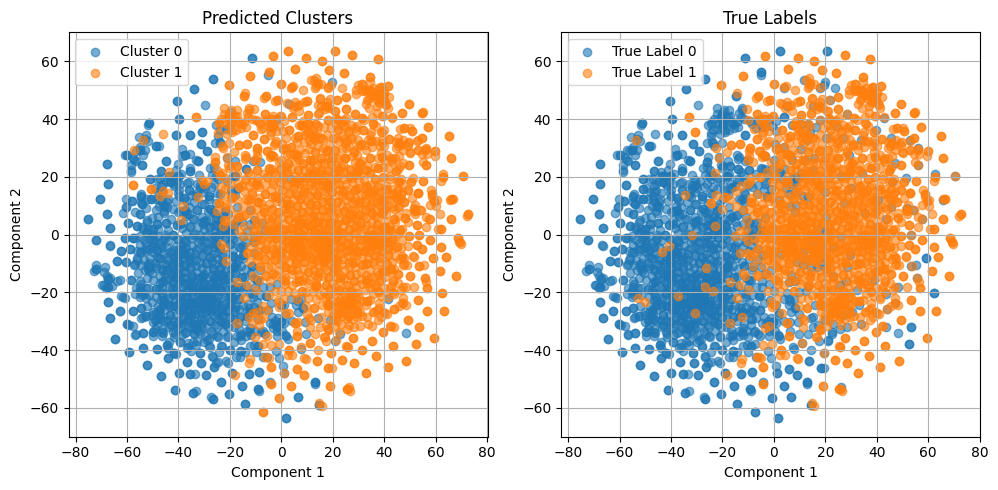

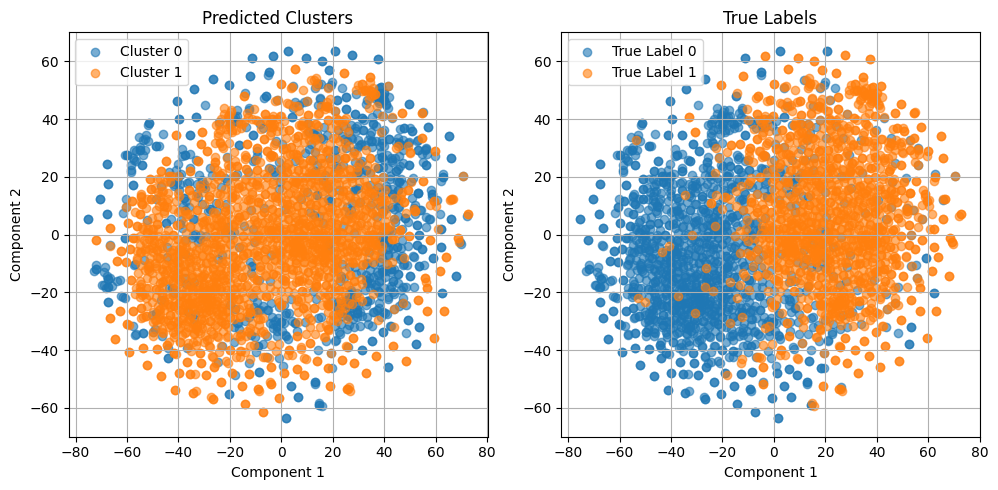

In [ ]:
import pandas as pd
import numpy as np
import torch
from transformers import BertTokenizer, BertModel
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score, calinski_harabasz_score
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)
torch.manual_seed(42)

def preprocess_text(text):
    text = text.lower()
    text = ' '.join(text.split())  # Remove extra whitespace
    return text

def initialize_bert_model(model_name="dumitrescustefan/bert-base-romanian-cased-v1"):
    tokenizer = BertTokenizer.from_pretrained(model_name)
    model = BertModel.from_pretrained(model_name)
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = model.to(device)
    return tokenizer, model, device

def get_bert_embeddings(text, tokenizer, model, device):
    # Tokenize and encode
    tokens = tokenizer(
        text,
        return_tensors="pt",
        padding=True,
        truncation=True,
        max_length=128
    ).to(device)

    # Get embeddings
    with torch.no_grad():
        outputs = model(**tokens)

    # Use attention mask for mean pooling
    attention_mask = tokens['attention_mask']
    token_embeddings = outputs.last_hidden_state

    # Calculate mean of all tokens (excluding padding)
    input_mask_expanded = attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
    sum_embeddings = torch.sum(token_embeddings * input_mask_expanded, 1)
    sum_mask = torch.clamp(input_mask_expanded.sum(1), min=1e-9)

    # Return mean pooled embeddings as a flattened numpy array
    return (sum_embeddings / sum_mask).squeeze().cpu().numpy()

def evaluate_clustering(embeddings, labels):
    """Evaluate clustering using multiple metrics"""
    silhouette = silhouette_score(embeddings, labels)
    calinski = calinski_harabasz_score(embeddings, labels)
    return silhouette, calinski

def plot_clustering(embeddings_reduced, labels, title, true_labels=None):
    """Plot clustering results"""
    plt.figure(figsize=(10, 5))

    if true_labels is not None:
        # Create two subplots
        plt.subplot(1, 2, 1)
        for cluster in range(2):
            plt.scatter(
                embeddings_reduced[labels == cluster, 0],
                embeddings_reduced[labels == cluster, 1],
                label=f"Cluster {cluster}",
                alpha=0.6
            )
        plt.title("Predicted Clusters")
        plt.xlabel("Component 1")
        plt.ylabel("Component 2")
        plt.legend()
        plt.grid(True)

        plt.subplot(1, 2, 2)
        for label in range(2):
            plt.scatter(
                embeddings_reduced[true_labels == label, 0],
                embeddings_reduced[true_labels == label, 1],
                label=f"True Label {label}",
                alpha=0.6
            )
        plt.title("True Labels")
        plt.xlabel("Component 1")
        plt.ylabel("Component 2")
        plt.legend()
        plt.grid(True)
    else:
        # Single plot for clustering results
        for cluster in range(2):
            plt.scatter(
                embeddings_reduced[labels == cluster, 0],
                embeddings_reduced[labels == cluster, 1],
                label=f"Cluster {cluster}",
                alpha=0.6
            )
        plt.title(title)
        plt.xlabel("Component 1")
        plt.ylabel("Component 2")
        plt.legend()
        plt.grid(True)

    plt.tight_layout()
    plt.show()

def main(texts, true_labels=None):
    # Initialize BERT
    tokenizer, model, device = initialize_bert_model()

    # Preprocess texts and get embeddings
    processed_texts = [preprocess_text(text) for text in texts]
    embeddings = np.array([get_bert_embeddings(text, tokenizer, model, device) for text in processed_texts])

    # Normalize embeddings
    scaler = StandardScaler()
    embeddings_normalized = scaler.fit_transform(embeddings)

    # Try both K-means and GMM
    # K-means
    kmeans = KMeans(
        n_clusters=2,
        n_init=10,
        random_state=42,
        init='k-means++',
        max_iter=300
    )
    kmeans_labels = kmeans.fit_predict(embeddings_normalized)

    # GMM
    gmm = GaussianMixture(
        n_components=2,
        random_state=42,
        n_init=10,
        covariance_type='full'
    )
    gmm_labels = gmm.fit_predict(embeddings_normalized)

    # Evaluate both methods
    kmeans_scores = evaluate_clustering(embeddings_normalized, kmeans_labels)
    gmm_scores = evaluate_clustering(embeddings_normalized, gmm_labels)

    print("K-means Clustering Scores:")
    print(f"Silhouette Score: {kmeans_scores[0]:.3f}")
    print(f"Calinski-Harabasz Score: {kmeans_scores[1]:.3f}")
    print("\nGMM Clustering Scores:")
    print(f"Silhouette Score: {gmm_scores[0]:.3f}")
    print(f"Calinski-Harabasz Score: {gmm_scores[1]:.3f}")

    # Reduce dimensionality for visualization
    reducer = TSNE(
        n_components=2,
        random_state=42,
        perplexity=30,
        n_iter=1000,
        learning_rate='auto',
        init='pca'
    )
    embeddings_reduced = reducer.fit_transform(embeddings_normalized)

    # Plot results
    if true_labels is not None:
        plot_clustering(embeddings_reduced, kmeans_labels, "K-means Clustering", true_labels)
        plot_clustering(embeddings_reduced, gmm_labels, "GMM Clustering", true_labels)
    else:
        plot_clustering(embeddings_reduced, kmeans_labels, "K-means Clustering")
        plot_clustering(embeddings_reduced, gmm_labels, "GMM Clustering")

    return kmeans_labels, gmm_labels, embeddings_reduced

# Example usage:
if __name__ == "__main__":
    # Assuming you have your texts and labels in lists or arrays
    texts = texte
    true_labels = real_labels  # Optional
    kmeans_labels, gmm_labels, embeddings_reduced = main(texts, true_labels)